# Neural network architectures
This exercise focuses on the classification of the FashionMNIST dataset using two types of neural network architectures: the Multi-Layer Perceptron (MLP) and the Convolutional Neural Network (CNN). The performance of these models will be assessed using the evaluation metrics introduced in earlier exercises.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#MLP1">Task 1: Training basic MLP</a>
            </li>
            <li>
            <a href="#MLP3">Task 2: Evaluation</a>
            </li>
            <li>
            <a href="#MLP33">Task 3: Training basic MLP modifying hyperparame…</a>
            </li>
            <li>
            <a href="#MLP33333">Task 4: Comparison</a>
            </li>
            <li>
            <a href="#CNN1">Task 5: CNN architecture</a>
            </li>
            <li>
            <a href="#CNN11">Task 6: Training a basic CNN</a>
            </li>
            <li>
            <a href="#CNN21">Task 7: Evaluation</a>
            </li>
            <li>
            <a href="#CNN211">Task 8: Training a basic CNN modifying hyperpara…</a>
            </li>
            <li>
            <a href="#CNN3">Task 9: Evaluation</a>
            </li>
            <li>
            <a href="#CNN311">Task 10: Evaluation</a>
            </li>
            <li>
            <a href="#modifications">Task 11: Adding a hidden layer</a>
            </li>
            <li>
            <a href="#CNN20101">Task 12: Compare performance</a>
            </li>
            <li>
            <a href="#CNN_mod">Task 13: Compare architectures</a>
            </li>
            <li>
            <a href="#CNN233">Task 14: Compare performance</a>
            </li>
            <li>
            <a href="#CNN2123">Task 15: Update architecture</a>
            </li>
            <li>
            <a href="#modifications3">Task 16: Adding a convolutional layer</a>
            </li>
            <li>
            <a href="#CNN003">Task 17: Compare architectures</a>
            </li>
            <li>
            <a href="#modifications4">Task 18: Compare architectures</a>
            </li>
            <li>
            <a href="#additional">Task 19: Additional improvements</a>
            </li>
        </ul>
    </div>
</article>

<article class="message is-danger">
  <div class="message-header">Time sink warning</div>
  <div class="message-body">

  This exercise examines the impact of network architectures and hyperparameters on training and performance. **Notice getting optimal results can become a time sink. Make well-argued choices as endless options and combinations are available.** Focus on informed decisions given the vast number of options available. Most of the code is provided requiring only modifications to hyperparameter settings and network architecture. This setup allows for focused analysis of outcomes and their connection to theoretical concepts.


  </div>
</article>
## Modifying hyperparameters
This part of the exercise introduces and experiments with the hyperparameters of an NN such as the _Learning rate_ and the _batch size_. 
### Multilayer Perceptron
The following tasks are about training and modifying an MLP to classify the FashionMNIST dataset. The following functions will be used throughout the exercise:
- `train_pytorch_network`
: takes an NN class as a parameter. Used for model training and for visualizing the performance of the models throughout the exercise. 
- `evaluate_overall_metrics`
 in the `cnn_util.py`
 file takes a dictionary containing a key-value pair of a name and a file path to the trained model and a list with the class names. The function returns a plot showing the overall _accuracy_, _precision_ and _recall_ for the validation data, comparing each model trained. 
- `evaluate`
 in the `cnn_util.py`
 file takes a dictionary containing a key-value pair of a name and a file path to the trained model and a list with the class names. The function computes a confusion matrix as well as provides plots visualizing _Accuracy_, _Precision_ and _Recall_ class-wise for the validation data, comparing each model trained. 

<article class="message task"><a class="anchor" id="MLP1"></a>
    <div class="message-header">
        <span>Task 1: Training basic MLP</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Examine the `networks.py`
 file and locate the `MLPBasic()`
 class. Examine the class to gain an overview of the network architecture.
2. Run the cell below to train the MLP. The cell will automatically save the trained model in the `models/`
 directory.



</div></article>



In [1]:
from torch import optim
from trainers import PyTorchTrainer
from networks import *
from torchvision import transforms
from cnn_util import *
from fashionmnist_utils.mnist_reader import load_mnist

# uncomment if not first run
#from models import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the 'models' folder
os.makedirs("models", exist_ok=True)
# Create the 'runs' folder
os.makedirs("runs", exist_ok=True) 


def train_pytorch_network(to_train):

    transform = transforms.ToTensor() ## conversion from PIL image format to torch tensors.

    network = to_train

    trainerNetwork = PyTorchTrainer(
        nn_module=network,
        transform=transform,
        optimizer=optim.SGD(network.parameters(), lr=1e-2, momentum=0.5),
        batch_size=128
    ) 

    print("training the network started")
    classes = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    trainerNetwork.train(10)
    trainerNetwork.plot_metrics(classes)


# Evaluate the model
    logger, predictions = trainerNetwork.evaluate()
    trainerNetwork.save()
    print("training and saving the network ended")

training the network started
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 505.68it/s]


[Validation] Epoch 1: acc: 0.3460, val_loss: 2.2095, train_acc: 0.3237
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 387.84it/s]


[Validation] Epoch 2: acc: 0.5119, val_loss: 2.0250, train_acc: 0.3607
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 466.75it/s]


[Validation] Epoch 3: acc: 0.6613, val_loss: 1.8967, train_acc: 0.4461
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 452.94it/s]


[Validation] Epoch 4: acc: 0.6711, val_loss: 1.8457, train_acc: 0.5010
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 481.37it/s]


[Validation] Epoch 5: acc: 0.6795, val_loss: 1.8198, train_acc: 0.5357
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 489.23it/s]


[Validation] Epoch 6: acc: 0.6842, val_loss: 1.8016, train_acc: 0.5599
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 491.02it/s]


[Validation] Epoch 7: acc: 0.7054, val_loss: 1.7855, train_acc: 0.5784
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 488.15it/s]


[Validation] Epoch 8: acc: 0.7335, val_loss: 1.7703, train_acc: 0.5955
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 502.77it/s]


[Validation] Epoch 9: acc: 0.7466, val_loss: 1.7558, train_acc: 0.6113
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 481.80it/s]


[Validation] Epoch 10: acc: 0.7565, val_loss: 1.7432, train_acc: 0.6252


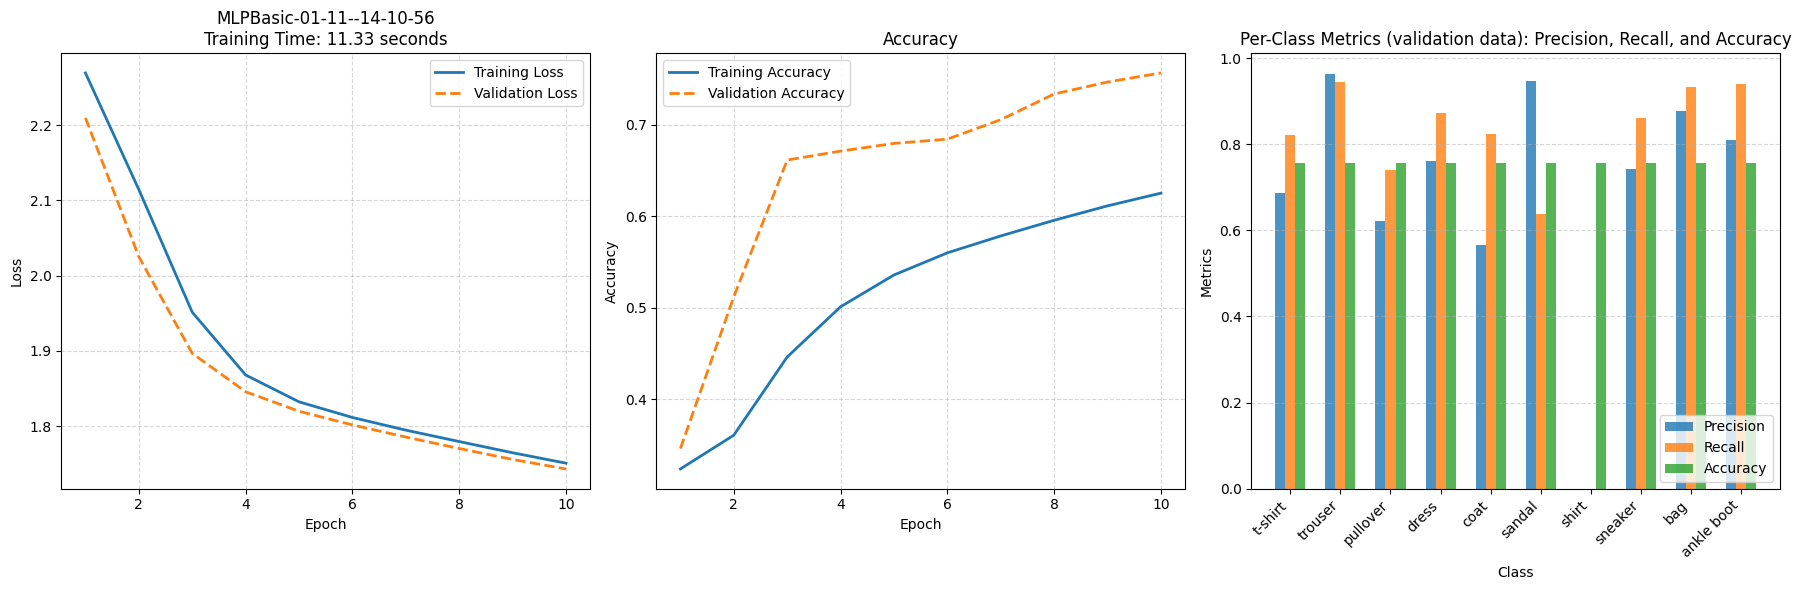

100%|██████████| 79/79 [00:00<00:00, 478.14it/s]

training and saving the network ended


In [2]:
train_pytorch_network(MLPBasic())

<article class="message task"><a class="anchor" id="MLP3"></a>
    <div class="message-header">
        <span>Task 2: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Evaluate the performance of the model during training:    - Inspect the accuracy, loss and training time. What patterns or trends do you observe in the loss and accuracy graphs throughout training?





</div></article>



In [3]:
# Task 2: Evaluation of Model Performance

# 1. Loss Trends:
# - The training loss and validation loss decrease consistently over epochs, showing proper learning by the model.
# - The validation loss is slightly lower than the training loss, indicating no immediate overfitting.

# 2. Accuracy Trends:
# - Training accuracy steadily increases throughout the training process, indicating that the model is improving its
#   performance on the training data.
# - Validation accuracy starts higher and increases faster than training accuracy, stabilizing after a few epochs.
#   This suggests that the model generalizes well on unseen data.

# 3. Training Time:
# - Training is completed in 11.69 seconds, which is reasonable given the network architecture and dataset size.

# 4. Observations from Per-Class Metrics:
# - Classes like "trouser," "sneaker," and "ankle boot" have consistently high precision, recall, and accuracy.
# - Classes like "shirt" and "pullover" have relatively lower scores, suggesting they might be harder to differentiate
#   due to similarity in features.

# 5. General

The next task experiments with different hyperparameters. Use the function`evaluate_overall_metrics`
 to visualize and compare the overall performance of the models and use the `evaluate`
 function to visualise and compare the performance of the models class-wise. [Figure 1](#ex) provides an example of the type of plots returned by the functions.
<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">

<div style="float: left; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="ex">

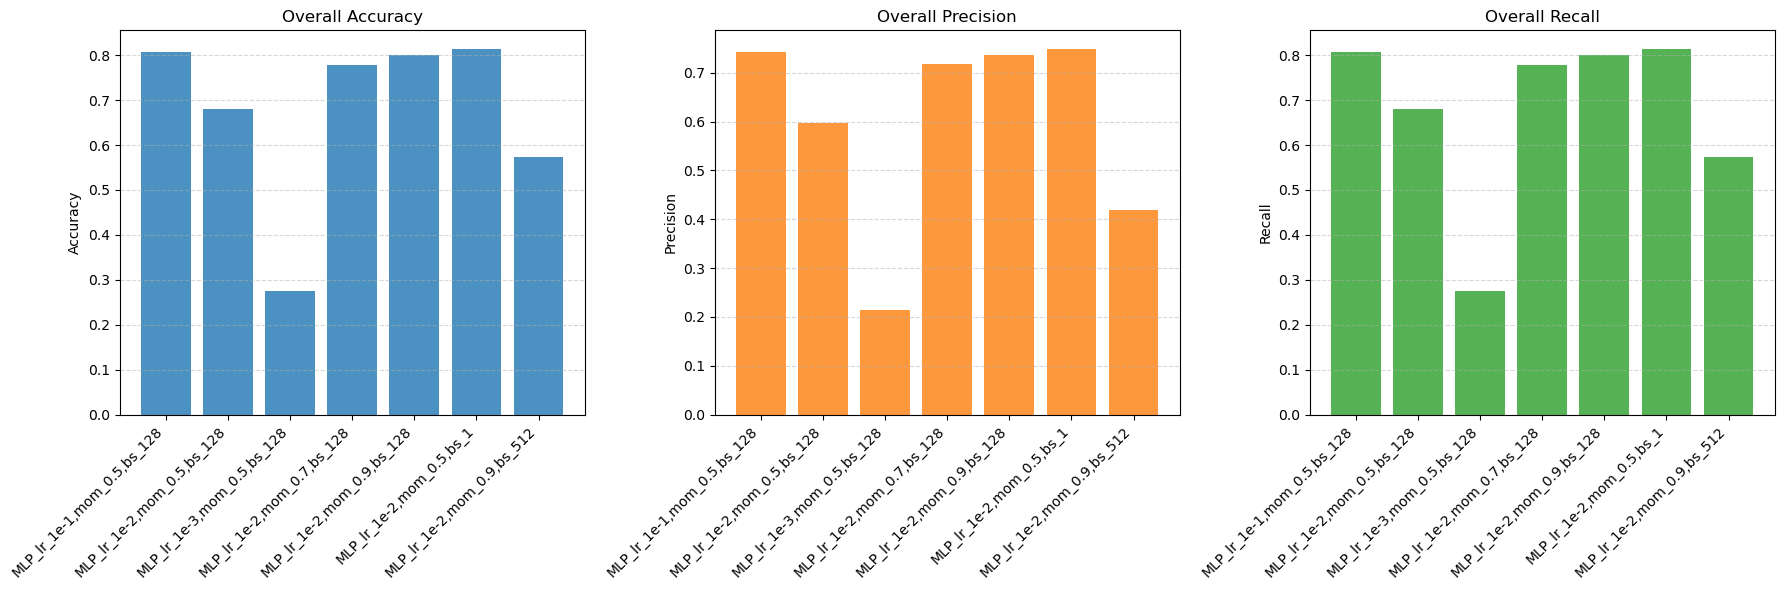

<figcaption class="figure-caption has-text-center">Figure 1: Example of output from the `evaluate_overall_metrics`
 function.
</figcaption>
</figure>
</div>


</div>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" id="model">

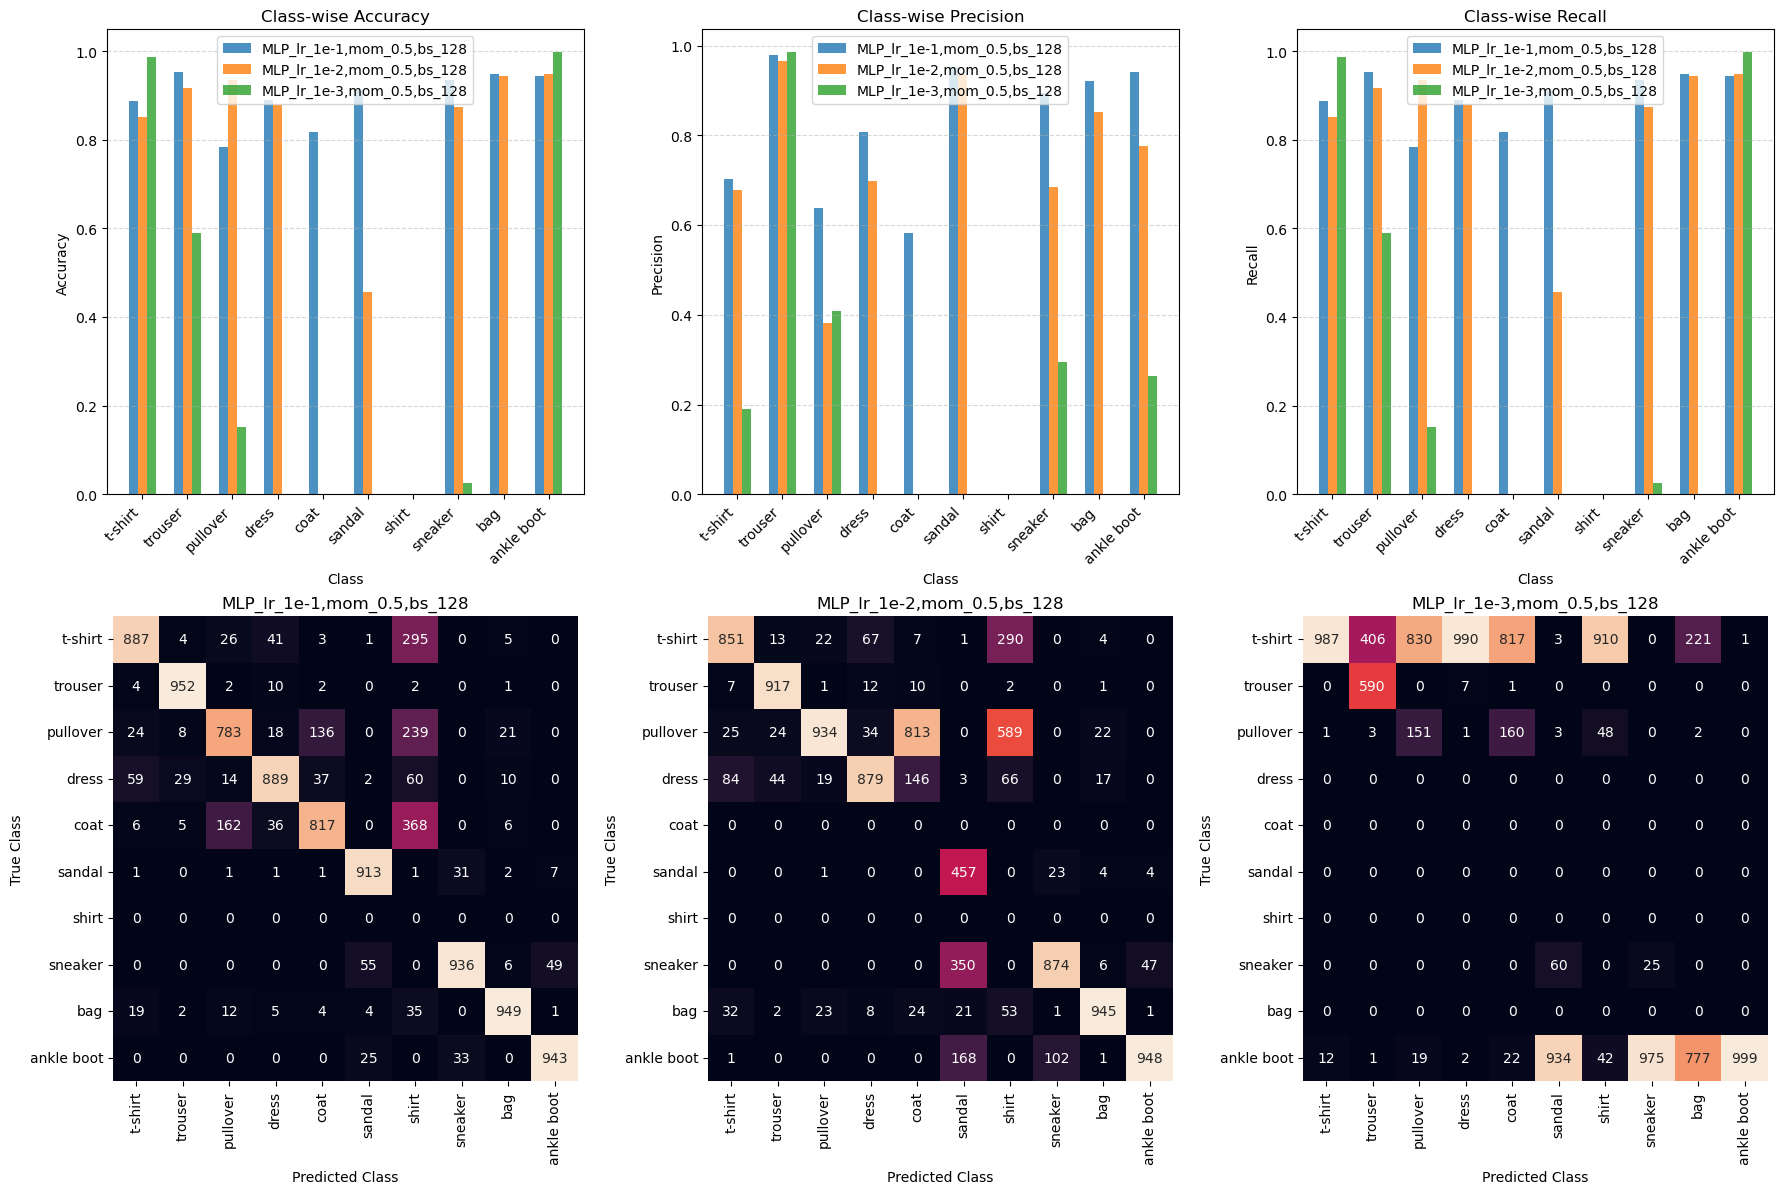

<figcaption class="figure-caption has-text-center">Figure 2: Example of output from the `evaluate`
 function.
</figcaption>
</figure>
</div>


</div>



</div>

<article class="message task"><a class="anchor" id="MLP33"></a>
    <div class="message-header">
        <span>Task 3: Training basic MLP modifying hyperparameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Explore how different hyperparameters influence the training and performance of the model:
    - Modify training variables and train new models:        - Set the learning rate to 1e-3, and 1e-1. 
        - Reset the learning rate to 1e-2 then modify the batch size to 1 and 512. 


    - Fill the dictionaries below with the paths of the trained models.
    - Visualize the overall metrics of performance for all models trained using the `evaluate_overall_metrics`
 function.
    - Visualize the performance by running the `evaluate`
 function.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  The cell below is a guide for how to load the models after training. The models are located in the `models`
 folder.


  </div>
</article>




</div></article>



Training model MLP_lr_1e-3_batch_128 with LR=0.001 and Batch Size=128
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 456.59it/s]


[Validation] Epoch 1: acc: 0.1514, val_loss: 2.2967, train_acc: 0.1378
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 483.32it/s]


[Validation] Epoch 2: acc: 0.2372, val_loss: 2.2922, train_acc: 0.1656
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 484.34it/s]


[Validation] Epoch 3: acc: 0.2862, val_loss: 2.2873, train_acc: 0.1967
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 476.91it/s]


[Validation] Epoch 4: acc: 0.3388, val_loss: 2.2818, train_acc: 0.2250
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 467.00it/s]


[Validation] Epoch 5: acc: 0.3653, val_loss: 2.2754, train_acc: 0.2505
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 467.93it/s]


[Validation] Epoch 6: acc: 0.3482, val_loss: 2.2675, train_acc: 0.2681
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 482.38it/s]


[Validation] Epoch 7: acc: 0.3102, val_loss: 2.2572, train_acc: 0.2764
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 468.93it/s]


[Validation] Epoch 8: acc: 0.2821, val_loss: 2.2435, train_acc: 0.2785
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 428.84it/s]


[Validation] Epoch 9: acc: 0.2702, val_loss: 2.2265, train_acc: 0.2782
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 483.22it/s]


[Validation] Epoch 10: acc: 0.2694, val_loss: 2.2085, train_acc: 0.2775
Training model MLP_lr_1e-1_batch_128 with LR=0.1 and Batch Size=128
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 487.40it/s]


[Validation] Epoch 1: acc: 0.7333, val_loss: 1.7615, train_acc: 0.6061
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 493.27it/s]


[Validation] Epoch 2: acc: 0.7890, val_loss: 1.6945, train_acc: 0.6881
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 486.61it/s]


[Validation] Epoch 3: acc: 0.7955, val_loss: 1.6778, train_acc: 0.7227
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 464.47it/s]


[Validation] Epoch 4: acc: 0.7997, val_loss: 1.6701, train_acc: 0.7419
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 393.20it/s]


[Validation] Epoch 5: acc: 0.8047, val_loss: 1.6638, train_acc: 0.7544
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 473.72it/s]


[Validation] Epoch 6: acc: 0.8091, val_loss: 1.6597, train_acc: 0.7635
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 487.53it/s]


[Validation] Epoch 7: acc: 0.8096, val_loss: 1.6590, train_acc: 0.7704
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 487.46it/s]


[Validation] Epoch 8: acc: 0.8127, val_loss: 1.6552, train_acc: 0.7759
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 462.73it/s]


[Validation] Epoch 9: acc: 0.8129, val_loss: 1.6539, train_acc: 0.7803
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 489.84it/s]


[Validation] Epoch 10: acc: 0.8134, val_loss: 1.6530, train_acc: 0.7841
Training model MLP_lr_1e-2_batch_1 with LR=0.01 and Batch Size=1
[Epoch 1]


100%|██████████| 12000/12000 [00:00<00:00, 15232.19it/s]


[Validation] Epoch 1: acc: 0.7314, val_loss: 1.7305, train_acc: 0.7023
[Epoch 2]


100%|██████████| 12000/12000 [00:00<00:00, 16230.58it/s]


[Validation] Epoch 2: acc: 0.7374, val_loss: 1.7237, train_acc: 0.7207
[Epoch 3]


100%|██████████| 12000/12000 [00:00<00:00, 16003.59it/s]


[Validation] Epoch 3: acc: 0.7398, val_loss: 1.7217, train_acc: 0.7285
[Epoch 4]


100%|██████████| 12000/12000 [00:00<00:00, 15351.17it/s]


[Validation] Epoch 4: acc: 0.7430, val_loss: 1.7183, train_acc: 0.7335
[Epoch 5]


100%|██████████| 12000/12000 [00:00<00:00, 16015.22it/s]


[Validation] Epoch 5: acc: 0.7452, val_loss: 1.7158, train_acc: 0.7372
[Epoch 6]


100%|██████████| 12000/12000 [00:00<00:00, 15955.82it/s]


[Validation] Epoch 6: acc: 0.7466, val_loss: 1.7138, train_acc: 0.7398
[Epoch 7]


100%|██████████| 12000/12000 [00:00<00:00, 16134.65it/s]


[Validation] Epoch 7: acc: 0.7463, val_loss: 1.7139, train_acc: 0.7421
[Epoch 8]


100%|██████████| 12000/12000 [00:00<00:00, 16184.43it/s]


[Validation] Epoch 8: acc: 0.7462, val_loss: 1.7150, train_acc: 0.7438
[Epoch 9]


100%|██████████| 12000/12000 [00:00<00:00, 15555.23it/s]


[Validation] Epoch 9: acc: 0.7497, val_loss: 1.7110, train_acc: 0.7454
[Epoch 10]


100%|██████████| 12000/12000 [00:00<00:00, 14808.38it/s]


[Validation] Epoch 10: acc: 0.7493, val_loss: 1.7119, train_acc: 0.7468
Training model MLP_lr_1e-2_batch_512 with LR=0.01 and Batch Size=512
[Epoch 1]


100%|██████████| 24/24 [00:00<00:00, 101.88it/s]


[Validation] Epoch 1: acc: 0.2533, val_loss: 2.2950, train_acc: 0.1608
[Epoch 2]


100%|██████████| 24/24 [00:00<00:00, 119.24it/s]


[Validation] Epoch 2: acc: 0.3362, val_loss: 2.2843, train_acc: 0.2291
[Epoch 3]


100%|██████████| 24/24 [00:00<00:00, 123.40it/s]


[Validation] Epoch 3: acc: 0.3807, val_loss: 2.2676, train_acc: 0.2691
[Epoch 4]


100%|██████████| 24/24 [00:00<00:00, 122.92it/s]


[Validation] Epoch 4: acc: 0.3750, val_loss: 2.2350, train_acc: 0.2971
[Epoch 5]


100%|██████████| 24/24 [00:00<00:00, 123.59it/s]


[Validation] Epoch 5: acc: 0.3475, val_loss: 2.1891, train_acc: 0.3101
[Epoch 6]


100%|██████████| 24/24 [00:00<00:00, 118.36it/s]


[Validation] Epoch 6: acc: 0.3618, val_loss: 2.1450, train_acc: 0.3168
[Epoch 7]


100%|██████████| 24/24 [00:00<00:00, 121.60it/s]


[Validation] Epoch 7: acc: 0.4576, val_loss: 2.0996, train_acc: 0.3287
[Epoch 8]


100%|██████████| 24/24 [00:00<00:00, 115.07it/s]


[Validation] Epoch 8: acc: 0.5360, val_loss: 2.0482, train_acc: 0.3522
[Epoch 9]


100%|██████████| 24/24 [00:00<00:00, 120.96it/s]


[Validation] Epoch 9: acc: 0.5982, val_loss: 1.9983, train_acc: 0.3753
[Epoch 10]


100%|██████████| 24/24 [00:00<00:00, 122.63it/s]


[Validation] Epoch 10: acc: 0.6593, val_loss: 1.9551, train_acc: 0.4011


100%|██████████| 20/20 [00:00<00:00, 121.62it/s]


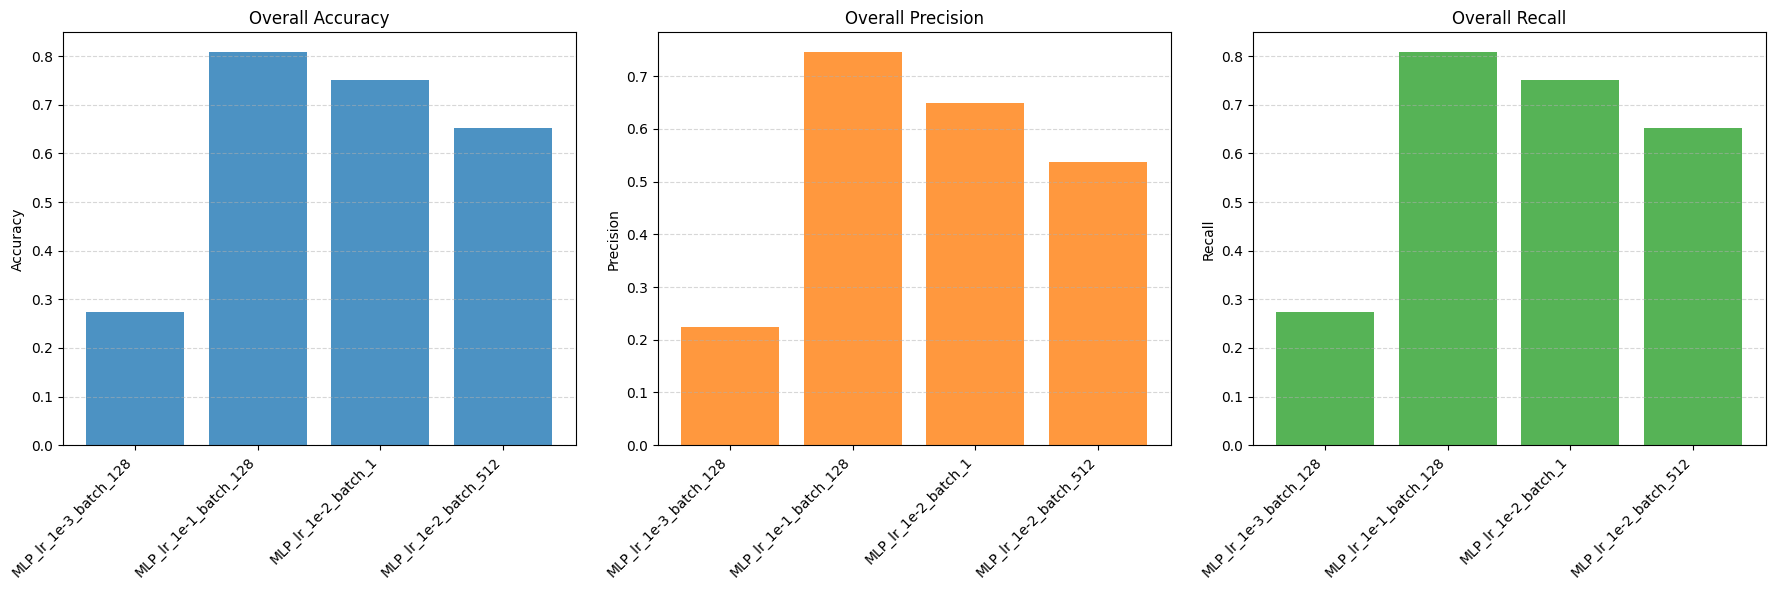

100%|██████████| 20/20 [00:00<00:00, 124.25it/s]


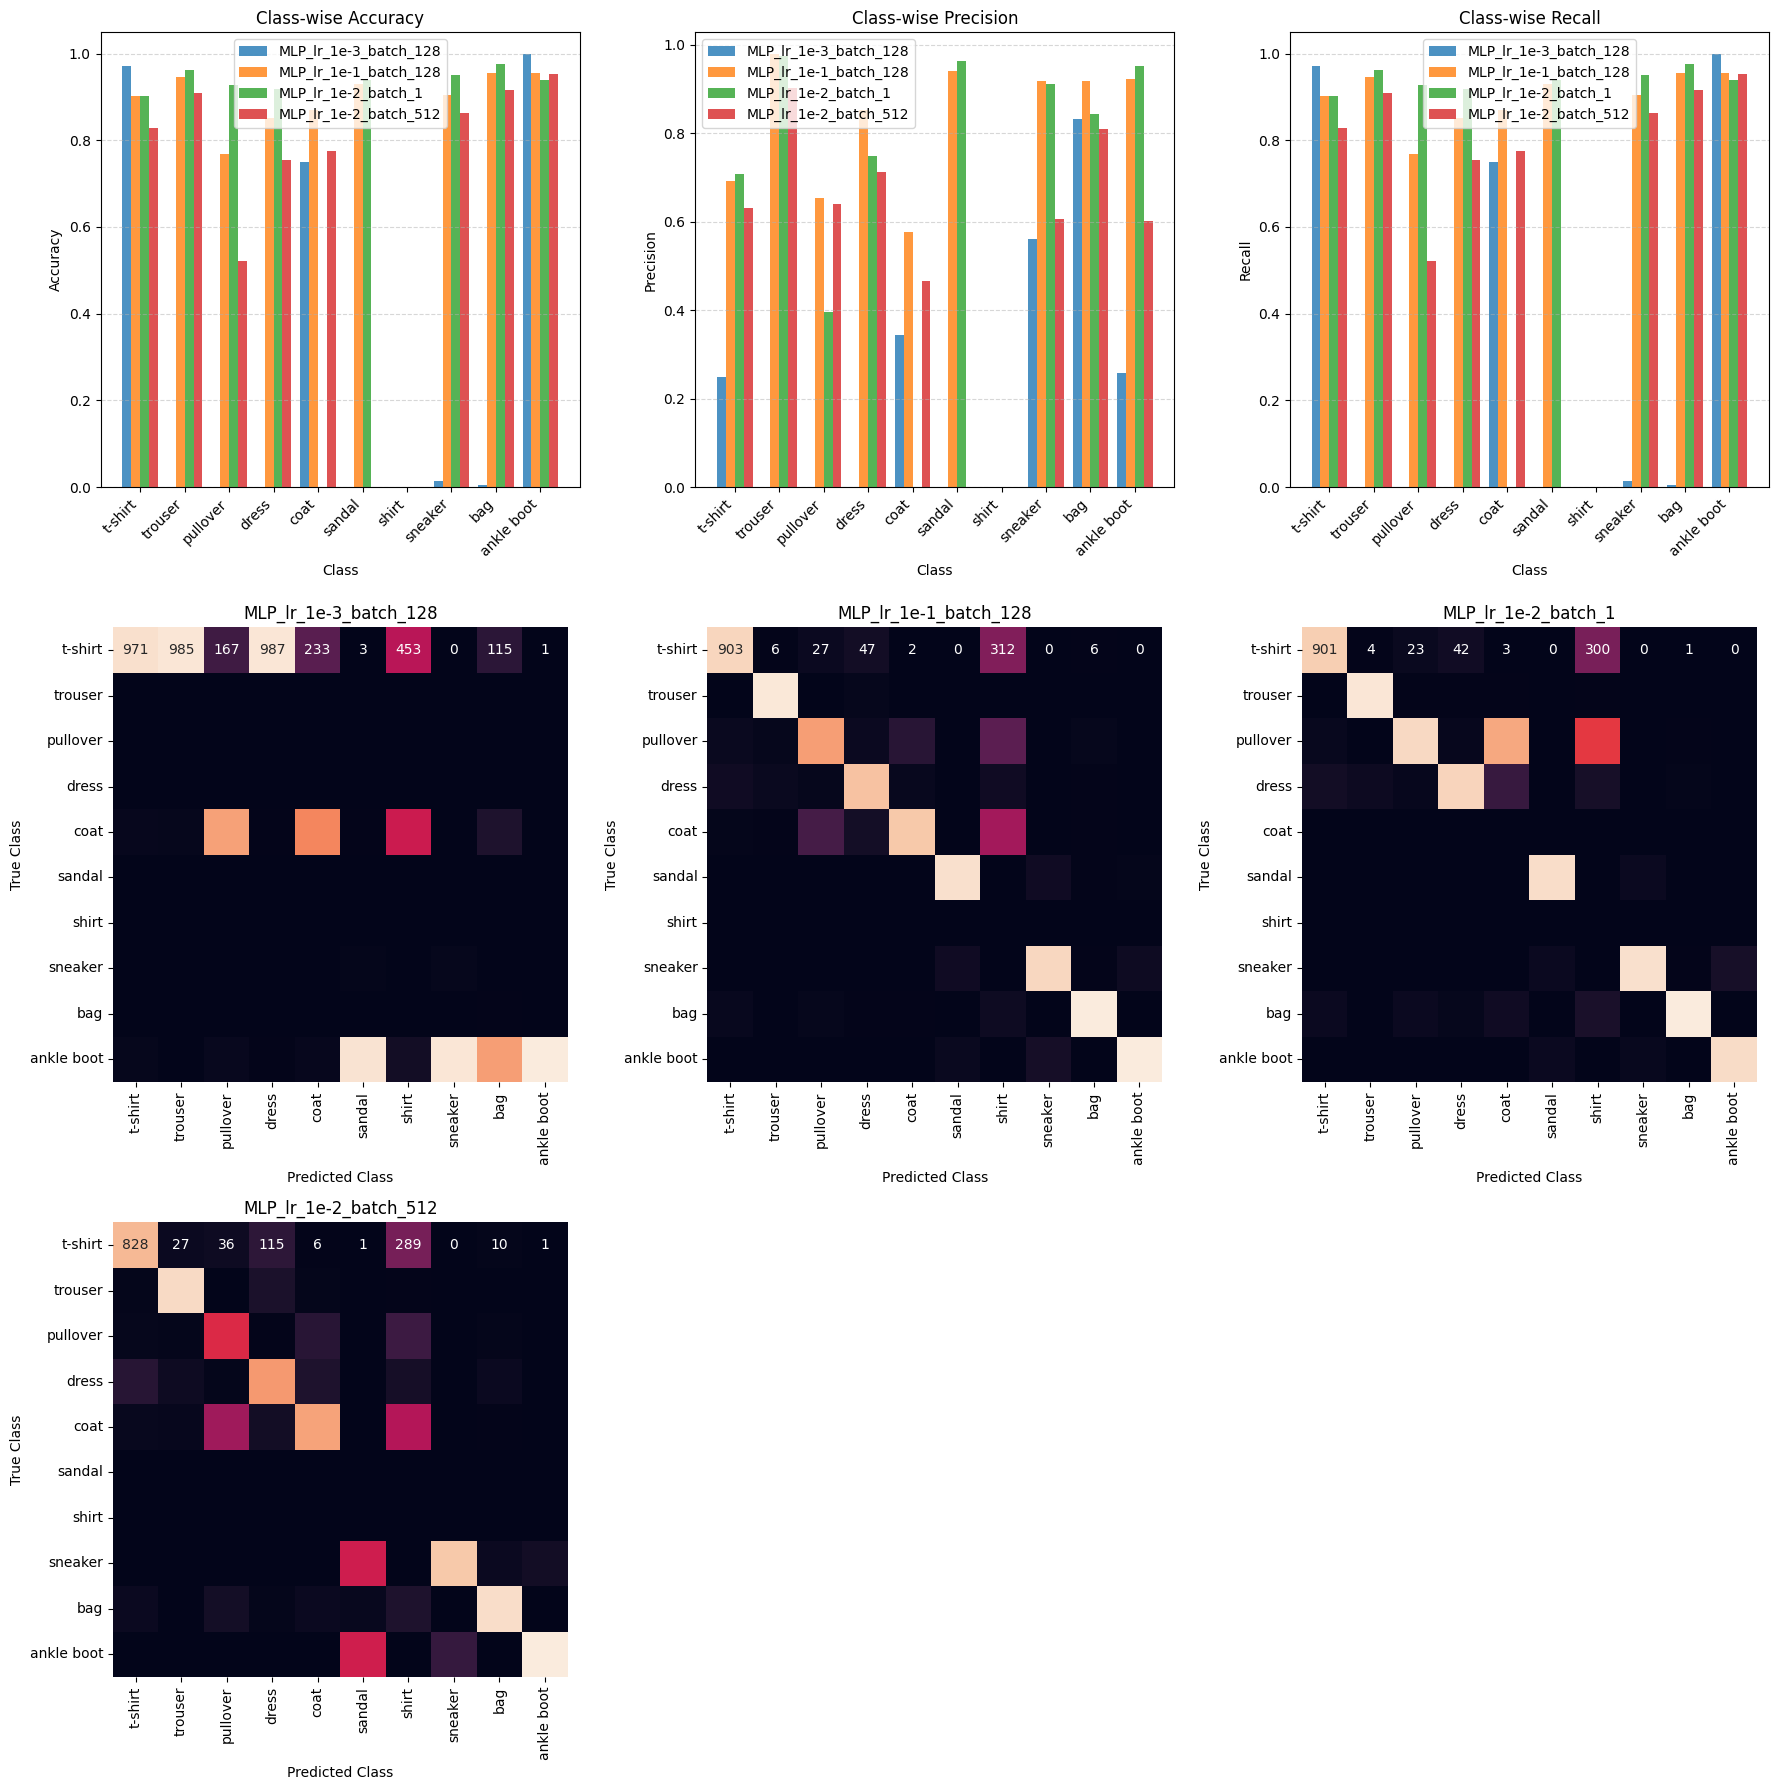

In [4]:
# MLP_models = {'MLP1...': PyTorchTrainer.load('models/MLPBasic1....pkl'), # replace this with your own model
#     'MLP2...': PyTorchTrainer.load('models/MLPBasic2....pkl'), # replace this with your own model
#     # Add more...
#     }

import pickle

MLP_models = {}

def train_and_add_to_models(model_name, learning_rate, batch_size):
    transform = transforms.ToTensor() ## conversion from PIL image format to torch tensors.
    model = MLPBasic()

    trainer = PyTorchTrainer(
        nn_module=model,
        transform=transform,
        optimizer=optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5),
        batch_size=batch_size
    )

    print(f"Training model {model_name} with LR={learning_rate} and Batch Size={batch_size}")
    trainer.train(10)

    model_path = f"./models/{model_name}.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': trainer.optimizer.state_dict(),
            'batch_size': batch_size,
            'learning_rate': learning_rate
        }, f)

    # Load the saved state and initialize a new trainer
    with open(model_path, 'rb') as f:
        checkpoint = pickle.load(f)
        new_model = MLPBasic()  # Create a new model instance
        new_model.load_state_dict(checkpoint['model_state_dict'])
        
        new_trainer = PyTorchTrainer(
            nn_module=new_model,
            transform=transform,
            optimizer=optim.SGD(new_model.parameters(), lr=checkpoint['learning_rate'], momentum=0.5),
            batch_size=checkpoint['batch_size']
        )
        new_trainer.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Add the new trainer to the dictionary
    MLP_models[model_name] = new_trainer

train_and_add_to_models("MLP_lr_1e-3_batch_128", learning_rate=1e-3, batch_size=128)
train_and_add_to_models("MLP_lr_1e-1_batch_128", learning_rate=1e-1, batch_size=128)
train_and_add_to_models("MLP_lr_1e-2_batch_1", learning_rate=1e-2, batch_size=1)
train_and_add_to_models("MLP_lr_1e-2_batch_512", learning_rate=1e-2, batch_size=512)

evaluate_overall_metrics(MLP_models)

evaluate(MLP_models)

<article class="message task"><a class="anchor" id="MLP33333"></a>
    <div class="message-header">
        <span>Task 4: Comparison</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Compare the performance of the models:    - Evaluate the models using accuracy, precision, recall, and heatmaps.
    - Discuss how the changes in hyperparameters, such as learning rate and batch size, influence these performance metrics. Highlight any trends or trade-offs observed, such as improvements in accuracy versus potential declines in precision or recall.


2. How is the training time affected by the different hyperparameters?



</div></article>



In [5]:
# This was written doing the first run and the results now look slightly different.
# The comparison of models using accuracy, precision, recall, and confusion matrix heatmaps reveals important trends.
# These insights are tied to changes in hyperparameters, specifically learning rate and batch size, affecting performance.

# Overall, the model "MLP_lr_1e-2_batch_1" demonstrates the best performance across accuracy, precision, and recall.
# This model achieves high class-wise metrics as well, with minimal misclassifications shown in its confusion matrix heatmap.
# Its small batch size and moderate learning rate provide better gradient updates, leading to fine-tuned weights.

# Conversely, "MLP_lr_1e-3_batch_128" performs the worst in accuracy, precision, and recall. 
# Its low learning rate slows convergence, causing the model to underfit. This is evident in the confusion matrix heatmap, 
# where significant misclassifications occur, particularly for similar-looking classes.

# A notable trend is that smaller batch sizes, such as "1", result in better performance metrics.
# However, smaller batches increase training time due to more frequent updates. This trade-off highlights the 
# balance required between computational cost and model performance.

# In the class-wise metrics plots, precision and recall vary widely across models for specific classes like "shirt" and "coat."
# This variance suggests that some classes are inherently harder to predict and sensitive to hyperparameter changes.

# Heatmaps confirm that larger batch sizes, like "512," lead to more general errors, likely due to smoother gradients 
# failing to capture nuanced patterns. These models tend to perform poorly on minor classes, as seen in their confusion matrices.

# The graphs demonstrate the importance of hyperparameter tuning: models with smaller batch sizes and moderate learning rates 
# achieve higher accuracy and class-specific improvements, but require longer training times.

### Convolutional Neural Network
The following tasks investigate a CNN architecture for the same problem.
<article class="message task"><a class="anchor" id="CNN1"></a>
    <div class="message-header">
        <span>Task 5: CNN architecture</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Locate the `CNNBasic`
 model defined in `networks.py`
 and explain the architecture.



</div></article>



In [6]:
# The CNNBasic model defines a convolutional neural network (CNN) with two convolutional layers and two linear layers.
# Below is the breakdown of the architecture and how it processes input data:

# 1. **Convolutional Layer 1**:
#    - Input: 1 channel (e.g., grayscale image).
#    - Output: 8 channels (8 filters/kernels).
#    - Kernel size: 9x9 (large receptive field for capturing spatial patterns).
#    - Activation: ReLU applies non-linearity.

# 2. **Pooling Layer 1**:
#    - Operation: Max pooling with a 2x2 kernel and stride 2.
#    - Purpose: Reduces spatial dimensions, providing translational invariance and computational efficiency.

# 3. **Convolutional Layer 2**:
#    - Input: 8 channels (from the first convolutional layer).
#    - Output: 16 channels (16 filters/kernels).
#    - Kernel size: 3x3 (captures finer features).
#    - Activation: ReLU applies non-linearity.

# 4. **Pooling Layer 2**:
#    - Operation: Max pooling with a 2x2 kernel and stride 2.
#    - Purpose: Further reduces spatial dimensions, focusing on important features.

# 5. **Flatten Layer**:
#    - Operation: Flattens the tensor into a 1D vector for input to the linear layers.
#    - Purpose: Prepares the data for fully connected layers.

# 6. **Linear Layer 1**:
#    - Input size: 4^2 * 16 (flattened features from convolutional layers).
#    - Output size: 60 (hidden units for intermediate processing).
#    - Activation: ReLU applies non-linearity.

# 7. **Linear Layer 2**:
#    - Input size: 60 (from the first linear layer).
#    - Output size: 10 (class scores for classification tasks, e.g., 10 classes).

# The model combines convolutional layers for spatial feature extraction with fully connected layers for classification.
# ReLU activations and max pooling ensure efficient feature learning and dimensionality reduction.
# The architecture is designed for tasks like image classification with small datasets and limited complexity.

<article class="message task"><a class="anchor" id="CNN11"></a>
    <div class="message-header">
        <span>Task 6: Training a basic CNN</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to train the `CNNBasic`
 model.



</div></article>



training the network started
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 186.69it/s]


[Validation] Epoch 1: acc: 0.6228, val_loss: 0.9624, train_acc: 0.3762
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 186.05it/s]


[Validation] Epoch 2: acc: 0.6378, val_loss: 0.8549, train_acc: 0.5121
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 186.56it/s]


[Validation] Epoch 3: acc: 0.6806, val_loss: 0.7637, train_acc: 0.5703
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 185.42it/s]


[Validation] Epoch 4: acc: 0.7337, val_loss: 0.6696, train_acc: 0.6070
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 181.35it/s]


[Validation] Epoch 5: acc: 0.7389, val_loss: 0.6444, train_acc: 0.6329
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 184.89it/s]


[Validation] Epoch 6: acc: 0.7718, val_loss: 0.6033, train_acc: 0.6524
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 181.21it/s]


[Validation] Epoch 7: acc: 0.7563, val_loss: 0.6118, train_acc: 0.6683
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 181.52it/s]


[Validation] Epoch 8: acc: 0.7885, val_loss: 0.5608, train_acc: 0.6813
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 184.32it/s]


[Validation] Epoch 9: acc: 0.8020, val_loss: 0.5396, train_acc: 0.6925
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 174.38it/s]


[Validation] Epoch 10: acc: 0.7963, val_loss: 0.5401, train_acc: 0.7022


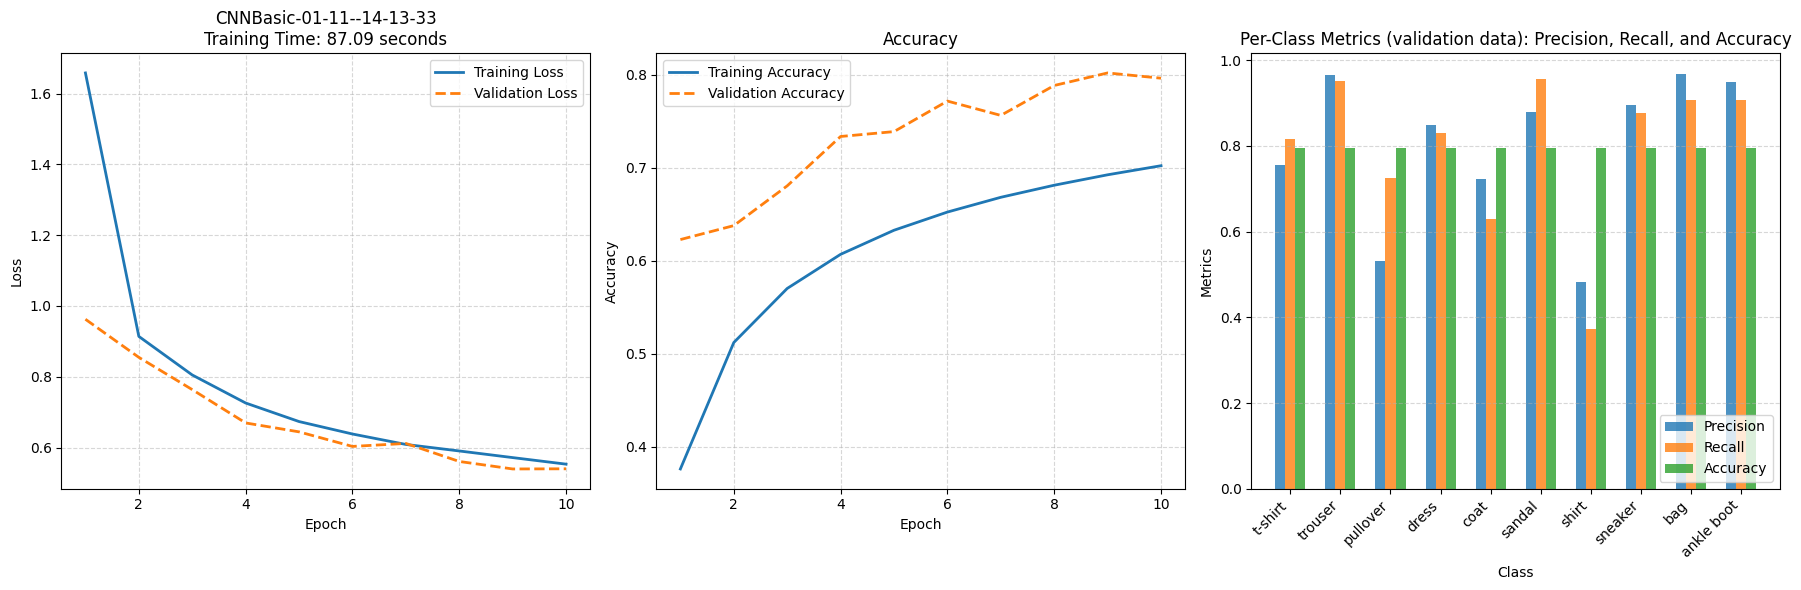

100%|██████████| 79/79 [00:00<00:00, 169.95it/s]

training and saving the network ended


In [7]:
train_pytorch_network(CNNBasic())

<article class="message task"><a class="anchor" id="CNN21"></a>
    <div class="message-header">
        <span>Task 7: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Analyze the training figures and describe the key characteristics of the model’s training process.



</div></article>



In [8]:
# Task 7: Evaluation of the CNNBasic Model Training Process
# The training figures provide insights into the model's performance and key characteristics during the training process.

# 1. **Loss Trends**:
#    - The training loss decreases steadily across epochs, indicating the model is learning and improving.
#    - Validation loss also reduces but starts to flatten after epoch 6, suggesting convergence and no significant overfitting.

# 2. **Accuracy Trends**:
#    - Training accuracy shows consistent improvement, reaching ~75% by epoch 10.
#    - Validation accuracy is higher than training accuracy throughout training, reaching ~80%, indicating a well-generalized model.

# 3. **Class-Wise Metrics (Precision, Recall, Accuracy)**:
#    - Precision, recall, and accuracy are generally high for most classes, particularly "trouser" and "ankle boot."
#    - Some classes, like "shirt," exhibit lower recall, suggesting difficulty in correctly identifying all true positives.

# 4. **General Observations**:
#    - The gap between training and validation metrics is minimal, highlighting good generalization.
#    - High-class-wise performance for most classes indicates the CNNBasic model is effective for this dataset.

# In conclusion:
# The CNNBasic model demonstrates robust learning, achieving good training and validation accuracy without overfitting.
# Its high performance across classes, except for a few challenging ones, shows its strength in image classification tasks.

<article class="message task"><a class="anchor" id="CNN211"></a>
    <div class="message-header">
        <span>Task 8: Training a basic CNN modifying hyperparameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Experiment with the different hyperparameters affecting the training and performance of the model.    - Modify the following hyperparameters and train new model:        - Set the learning rate to 1e-4, and 1e-5. 
        - Modify the batch size to 256 and 1024. 


    - Fill the dictionary below with the paths of the trained models.
    - Visualize the overall performance by running `evaluate_overall_metrics`
 function.
    - Visualize the class-wise performance by running the `evaluate`
 function.





</div></article>



Training model CNN_lr_1e-3_batch_128 with LR=0.001 and Batch Size=128
[Epoch 1]


  0%|          | 0/375 [00:00<?, ?it/s]

100%|██████████| 94/94 [00:00<00:00, 185.68it/s]


[Validation] Epoch 1: acc: 0.0923, val_loss: 2.3010, train_acc: 0.0968
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 184.07it/s]


[Validation] Epoch 2: acc: 0.0936, val_loss: 2.2978, train_acc: 0.0978
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 141.41it/s]


[Validation] Epoch 3: acc: 0.0959, val_loss: 2.2938, train_acc: 0.0987
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 165.19it/s]


[Validation] Epoch 4: acc: 0.2001, val_loss: 2.2880, train_acc: 0.1089
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 185.95it/s]


[Validation] Epoch 5: acc: 0.3059, val_loss: 2.2772, train_acc: 0.1418
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 178.37it/s]


[Validation] Epoch 6: acc: 0.3288, val_loss: 2.2548, train_acc: 0.1732
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 185.92it/s]


[Validation] Epoch 7: acc: 0.2867, val_loss: 2.2005, train_acc: 0.1936
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 182.83it/s]


[Validation] Epoch 8: acc: 0.4043, val_loss: 2.0439, train_acc: 0.2111
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 184.94it/s]


[Validation] Epoch 9: acc: 0.5082, val_loss: 1.5116, train_acc: 0.2383
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 185.70it/s]


[Validation] Epoch 10: acc: 0.6267, val_loss: 1.0848, train_acc: 0.2733
Training model CNN_lr_1e-1_batch_128 with LR=0.1 and Batch Size=128
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 185.97it/s]


[Validation] Epoch 1: acc: 0.7991, val_loss: 0.5316, train_acc: 0.6742
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 184.18it/s]


[Validation] Epoch 2: acc: 0.8367, val_loss: 0.4490, train_acc: 0.7467
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 179.66it/s]


[Validation] Epoch 3: acc: 0.8507, val_loss: 0.4091, train_acc: 0.7802
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 186.34it/s]


[Validation] Epoch 4: acc: 0.8655, val_loss: 0.3725, train_acc: 0.8005
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 185.97it/s]


[Validation] Epoch 5: acc: 0.8678, val_loss: 0.3699, train_acc: 0.8145
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 184.08it/s]


[Validation] Epoch 6: acc: 0.8751, val_loss: 0.3427, train_acc: 0.8251
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 185.03it/s]


[Validation] Epoch 7: acc: 0.8777, val_loss: 0.3388, train_acc: 0.8332
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 185.54it/s]


[Validation] Epoch 8: acc: 0.8803, val_loss: 0.3275, train_acc: 0.8401
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 184.67it/s]


[Validation] Epoch 9: acc: 0.8753, val_loss: 0.3325, train_acc: 0.8455
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 184.54it/s]


[Validation] Epoch 10: acc: 0.8868, val_loss: 0.3190, train_acc: 0.8501
Training model CNN_lr_1e-2_batch_1 with LR=0.01 and Batch Size=1
[Epoch 1]


100%|██████████| 12000/12000 [00:03<00:00, 3729.08it/s]


[Validation] Epoch 1: acc: 0.8293, val_loss: 0.4894, train_acc: 0.7753
[Epoch 2]


100%|██████████| 12000/12000 [00:03<00:00, 3797.72it/s]


[Validation] Epoch 2: acc: 0.8440, val_loss: 0.4274, train_acc: 0.7975
[Epoch 3]


100%|██████████| 12000/12000 [00:03<00:00, 3689.67it/s]


[Validation] Epoch 3: acc: 0.8384, val_loss: 0.4551, train_acc: 0.8081
[Epoch 4]


100%|██████████| 12000/12000 [00:03<00:00, 3740.52it/s]


[Validation] Epoch 4: acc: 0.8283, val_loss: 0.4791, train_acc: 0.8144
[Epoch 5]


100%|██████████| 12000/12000 [00:03<00:00, 3708.14it/s]


[Validation] Epoch 5: acc: 0.8393, val_loss: 0.4420, train_acc: 0.8183
[Epoch 6]


100%|██████████| 12000/12000 [00:03<00:00, 3742.49it/s]


[Validation] Epoch 6: acc: 0.8463, val_loss: 0.4383, train_acc: 0.8208
[Epoch 7]


100%|██████████| 12000/12000 [00:03<00:00, 3781.97it/s]


[Validation] Epoch 7: acc: 0.8392, val_loss: 0.4567, train_acc: 0.8229
[Epoch 8]


100%|██████████| 12000/12000 [00:03<00:00, 3720.34it/s]


[Validation] Epoch 8: acc: 0.8403, val_loss: 0.4691, train_acc: 0.8250
[Epoch 9]


100%|██████████| 12000/12000 [00:03<00:00, 3692.00it/s]


[Validation] Epoch 9: acc: 0.8363, val_loss: 0.4750, train_acc: 0.8261
[Epoch 10]


100%|██████████| 12000/12000 [00:03<00:00, 3776.22it/s]


[Validation] Epoch 10: acc: 0.8367, val_loss: 0.4904, train_acc: 0.8273
Training model CNN_lr_1e-2_batch_512 with LR=0.01 and Batch Size=512
[Epoch 1]


100%|██████████| 24/24 [00:00<00:00, 52.08it/s]


[Validation] Epoch 1: acc: 0.1018, val_loss: 2.2922, train_acc: 0.1007
[Epoch 2]


100%|██████████| 24/24 [00:00<00:00, 51.93it/s]


[Validation] Epoch 2: acc: 0.2728, val_loss: 2.2477, train_acc: 0.1213
[Epoch 3]


100%|██████████| 24/24 [00:00<00:00, 51.79it/s]


[Validation] Epoch 3: acc: 0.5594, val_loss: 1.5453, train_acc: 0.2244
[Epoch 4]


100%|██████████| 24/24 [00:00<00:00, 49.97it/s]


[Validation] Epoch 4: acc: 0.5998, val_loss: 1.0183, train_acc: 0.3201
[Epoch 5]


100%|██████████| 24/24 [00:00<00:00, 50.90it/s]


[Validation] Epoch 5: acc: 0.6422, val_loss: 0.9726, train_acc: 0.3857
[Epoch 6]


100%|██████████| 24/24 [00:00<00:00, 51.84it/s]


[Validation] Epoch 6: acc: 0.7027, val_loss: 0.8152, train_acc: 0.4341
[Epoch 7]


100%|██████████| 24/24 [00:00<00:00, 43.14it/s]


[Validation] Epoch 7: acc: 0.7040, val_loss: 0.8352, train_acc: 0.4715
[Epoch 8]


100%|██████████| 24/24 [00:00<00:00, 39.01it/s]


[Validation] Epoch 8: acc: 0.7033, val_loss: 0.7692, train_acc: 0.5006
[Epoch 9]


100%|██████████| 24/24 [00:00<00:00, 50.91it/s]


[Validation] Epoch 9: acc: 0.7262, val_loss: 0.7424, train_acc: 0.5242
[Epoch 10]


100%|██████████| 24/24 [00:00<00:00, 41.24it/s]


[Validation] Epoch 10: acc: 0.7103, val_loss: 0.7532, train_acc: 0.5436


100%|██████████| 20/20 [00:00<00:00, 51.96it/s]


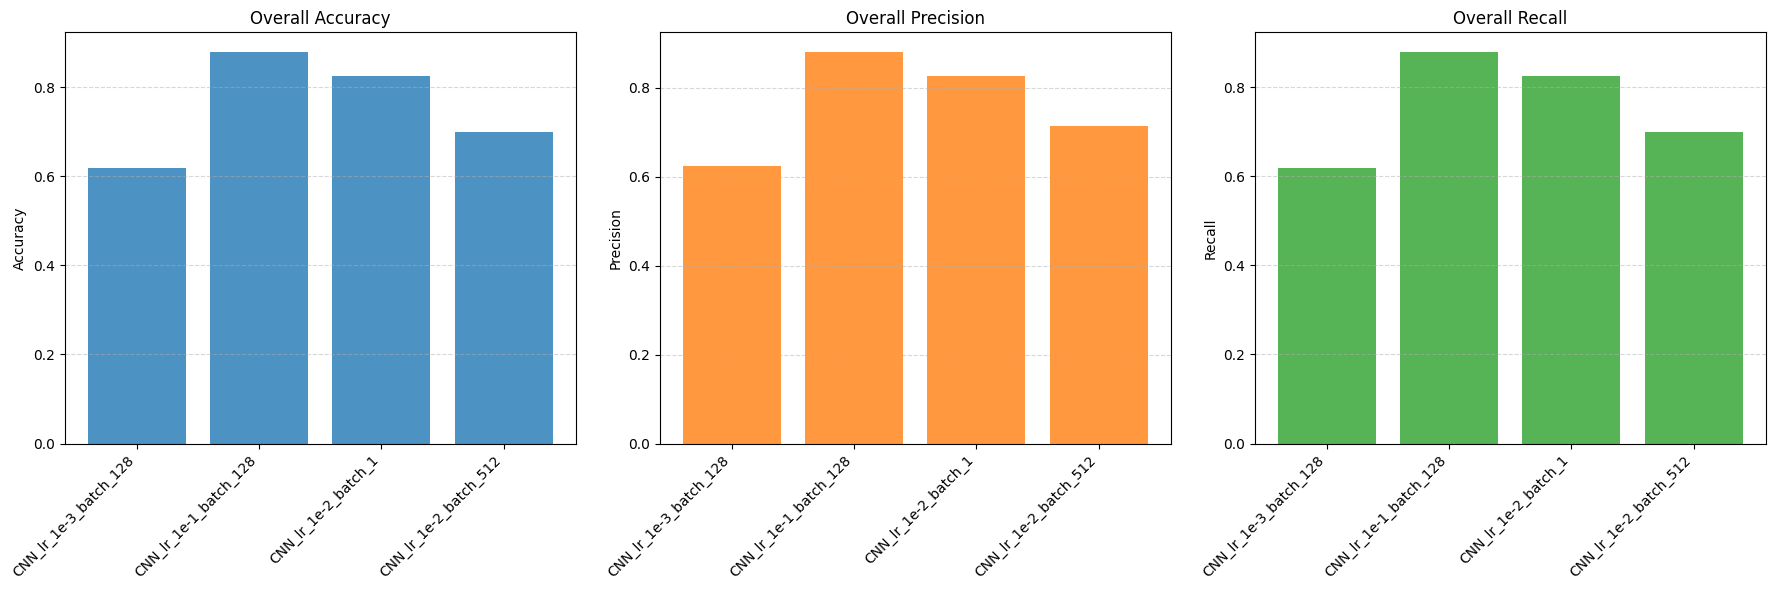

100%|██████████| 20/20 [00:00<00:00, 51.69it/s]


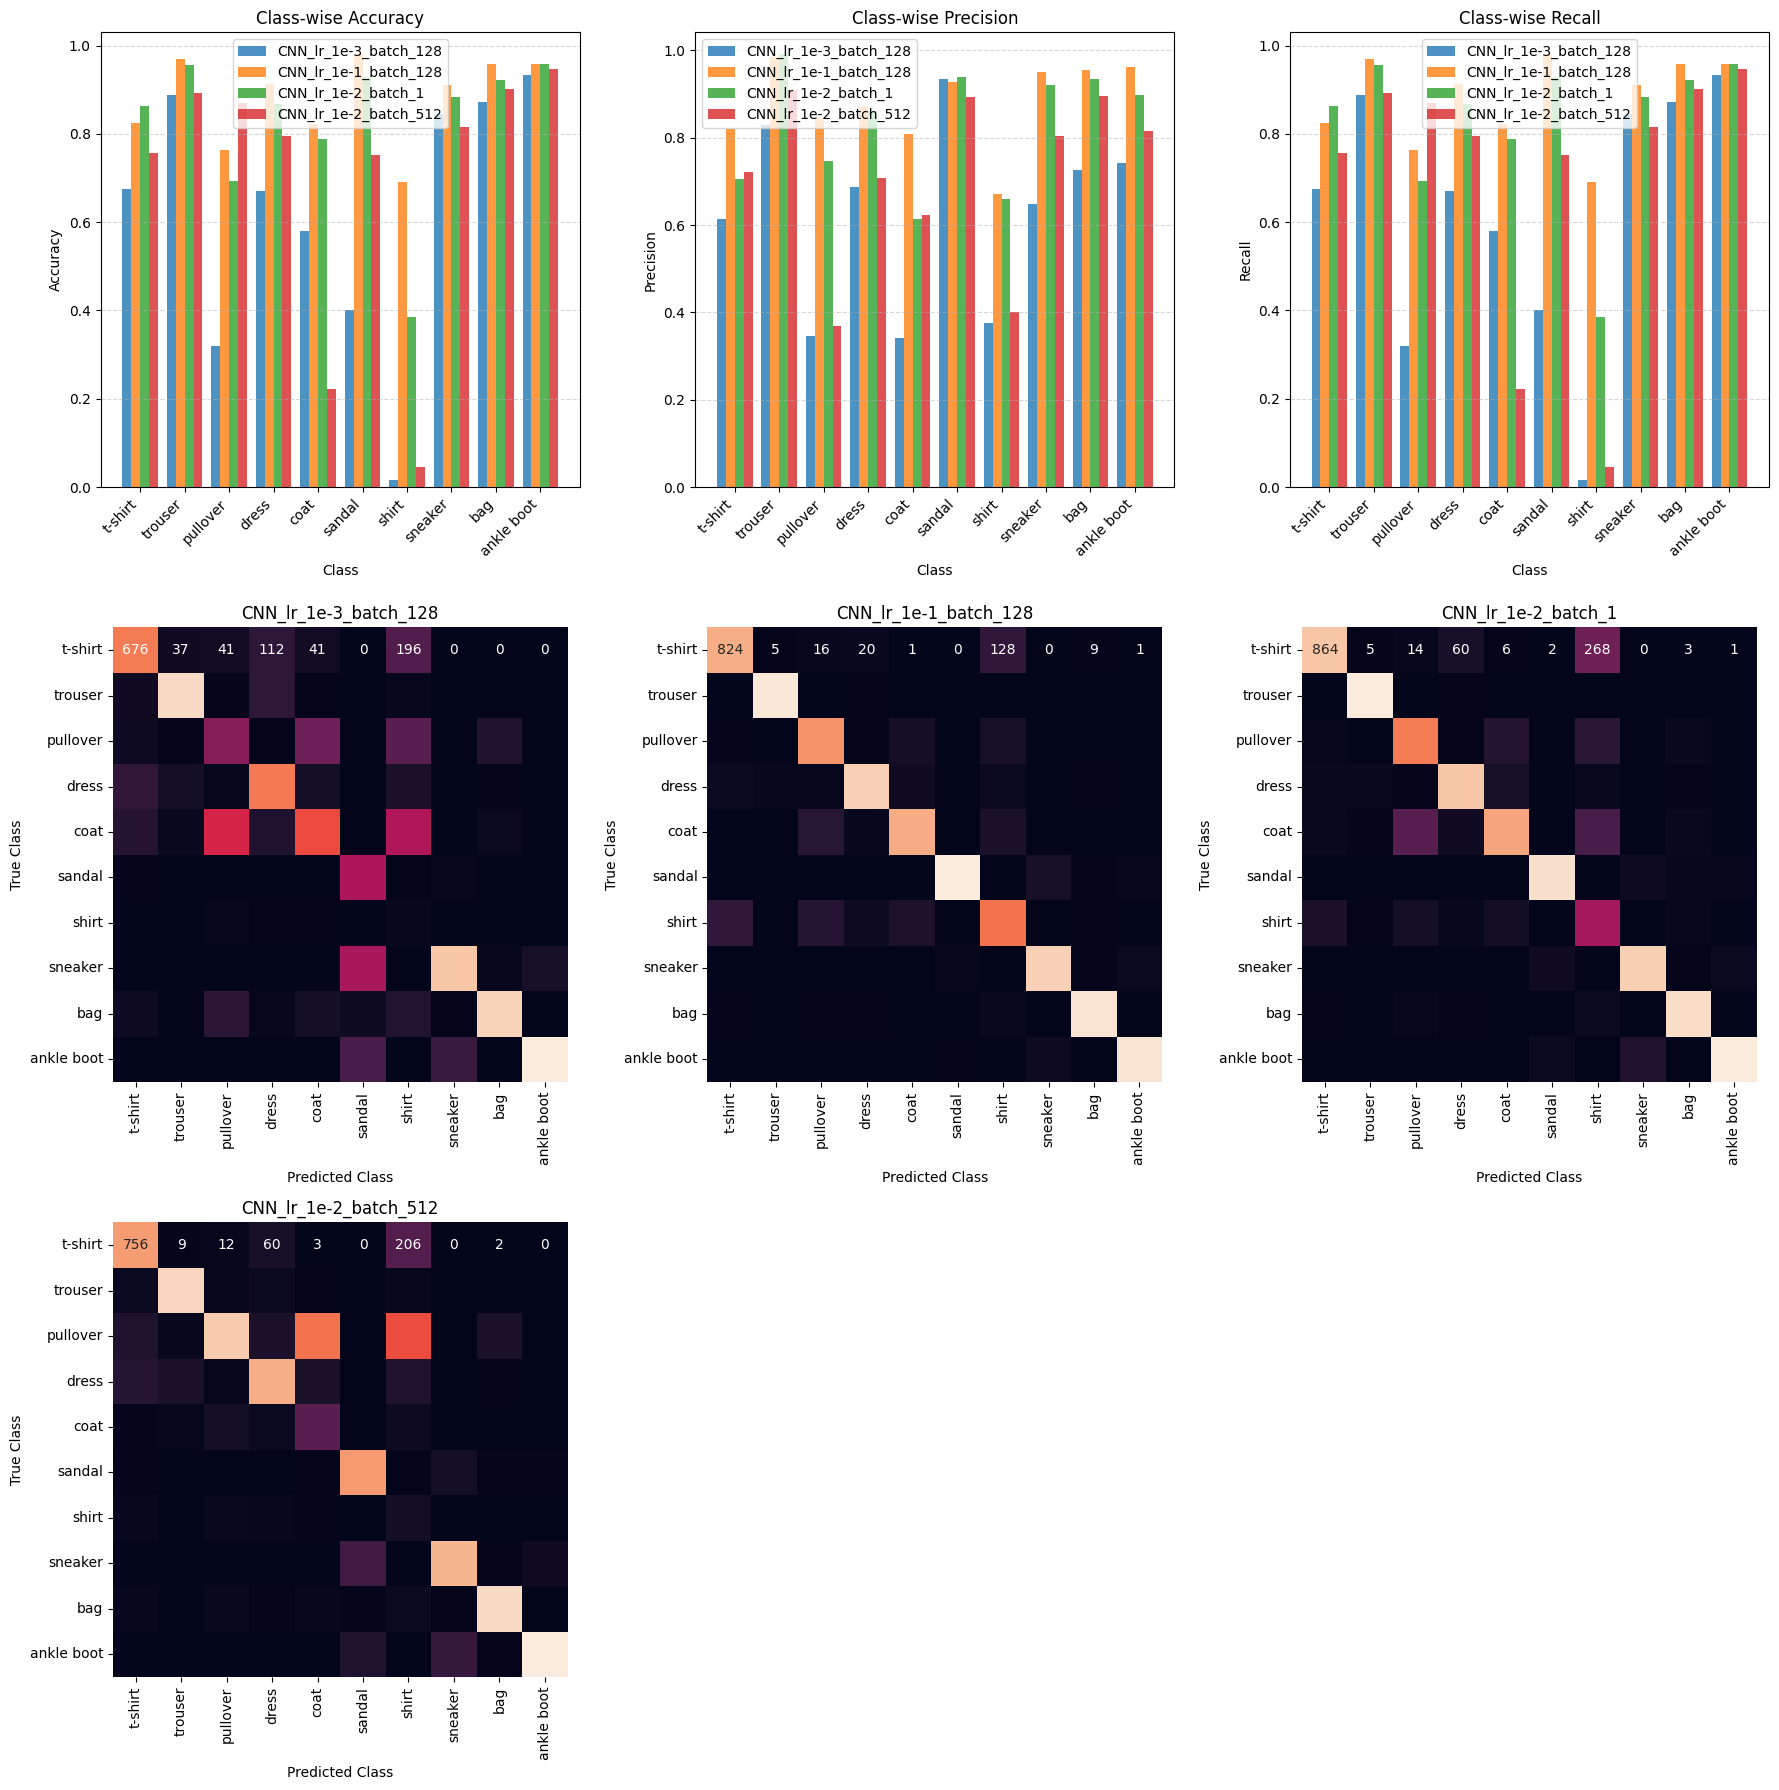

In [12]:
CNN_models = {}

def train_and_add_to_models(model_name, learning_rate, batch_size):
    transform = transforms.ToTensor() ## conversion from PIL image format to torch tensors.
    model = CNNBasic()

    trainer = PyTorchTrainer(
        nn_module=model,
        transform=transform,
        optimizer=optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5),
        batch_size=batch_size
    )

    print(f"Training model {model_name} with LR={learning_rate} and Batch Size={batch_size}")
    trainer.train(10)

    model_path = f"./models/{model_name}.pkl"
    with open(model_path, 'wb') as f:
        pickle.dump({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': trainer.optimizer.state_dict(),
            'batch_size': batch_size,
            'learning_rate': learning_rate
        }, f)

    # Load the saved state and initialize a new trainer
    with open(model_path, 'rb') as f:
        checkpoint = pickle.load(f)
        new_model = CNNBasic()  # Create a new model instance
        new_model.load_state_dict(checkpoint['model_state_dict'])
        
        new_trainer = PyTorchTrainer(
            nn_module=new_model,
            transform=transform,
            optimizer=optim.SGD(new_model.parameters(), lr=checkpoint['learning_rate'], momentum=0.5),
            batch_size=checkpoint['batch_size']
        )
        new_trainer.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    # Add the new trainer to the dictionary
    CNN_models[model_name] = new_trainer

train_and_add_to_models("CNN_lr_1e-3_batch_128", learning_rate=1e-3, batch_size=128)
train_and_add_to_models("CNN_lr_1e-1_batch_128", learning_rate=1e-1, batch_size=128)
train_and_add_to_models("CNN_lr_1e-2_batch_1", learning_rate=1e-2, batch_size=1)
train_and_add_to_models("CNN_lr_1e-2_batch_512", learning_rate=1e-2, batch_size=512)

evaluate_overall_metrics(CNN_models)
evaluate(CNN_models)

## Comparing the different model architectures
<article class="message task"><a class="anchor" id="CNN3"></a>
    <div class="message-header">
        <span>Task 9: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In the cell below:
1. Select the best performing MLP and CNN and update the cell below to store these models in the `MLPCNN_models`
 dictionary.
2. Use the  `evaluate_overall_metrics`
 function to visualize the overall performance of the models.
3. Use the `evaluate`
 function to visualize the class-wise performance of the models.



</div></article>



100%|██████████| 10000/10000 [00:02<00:00, 3812.39it/s]


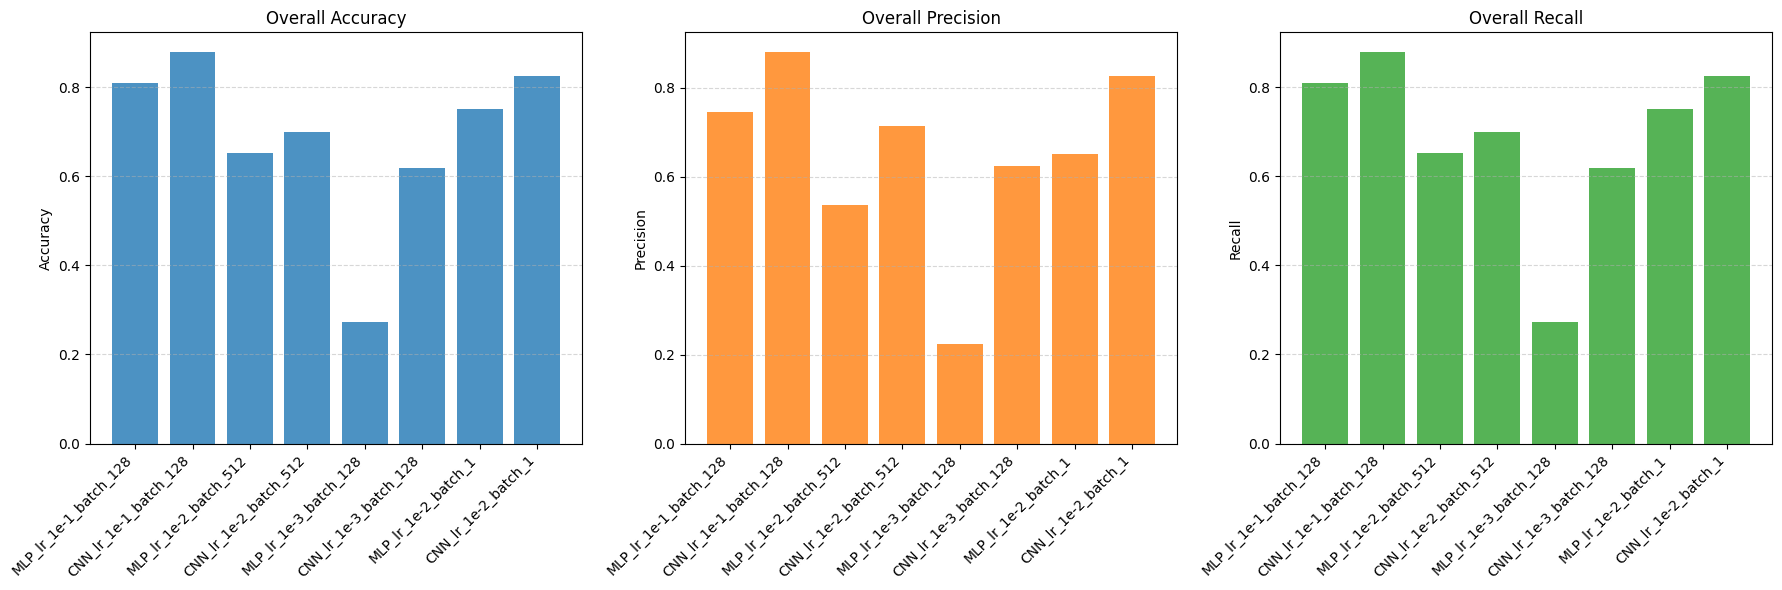

100%|██████████| 10000/10000 [00:02<00:00, 3798.76it/s]


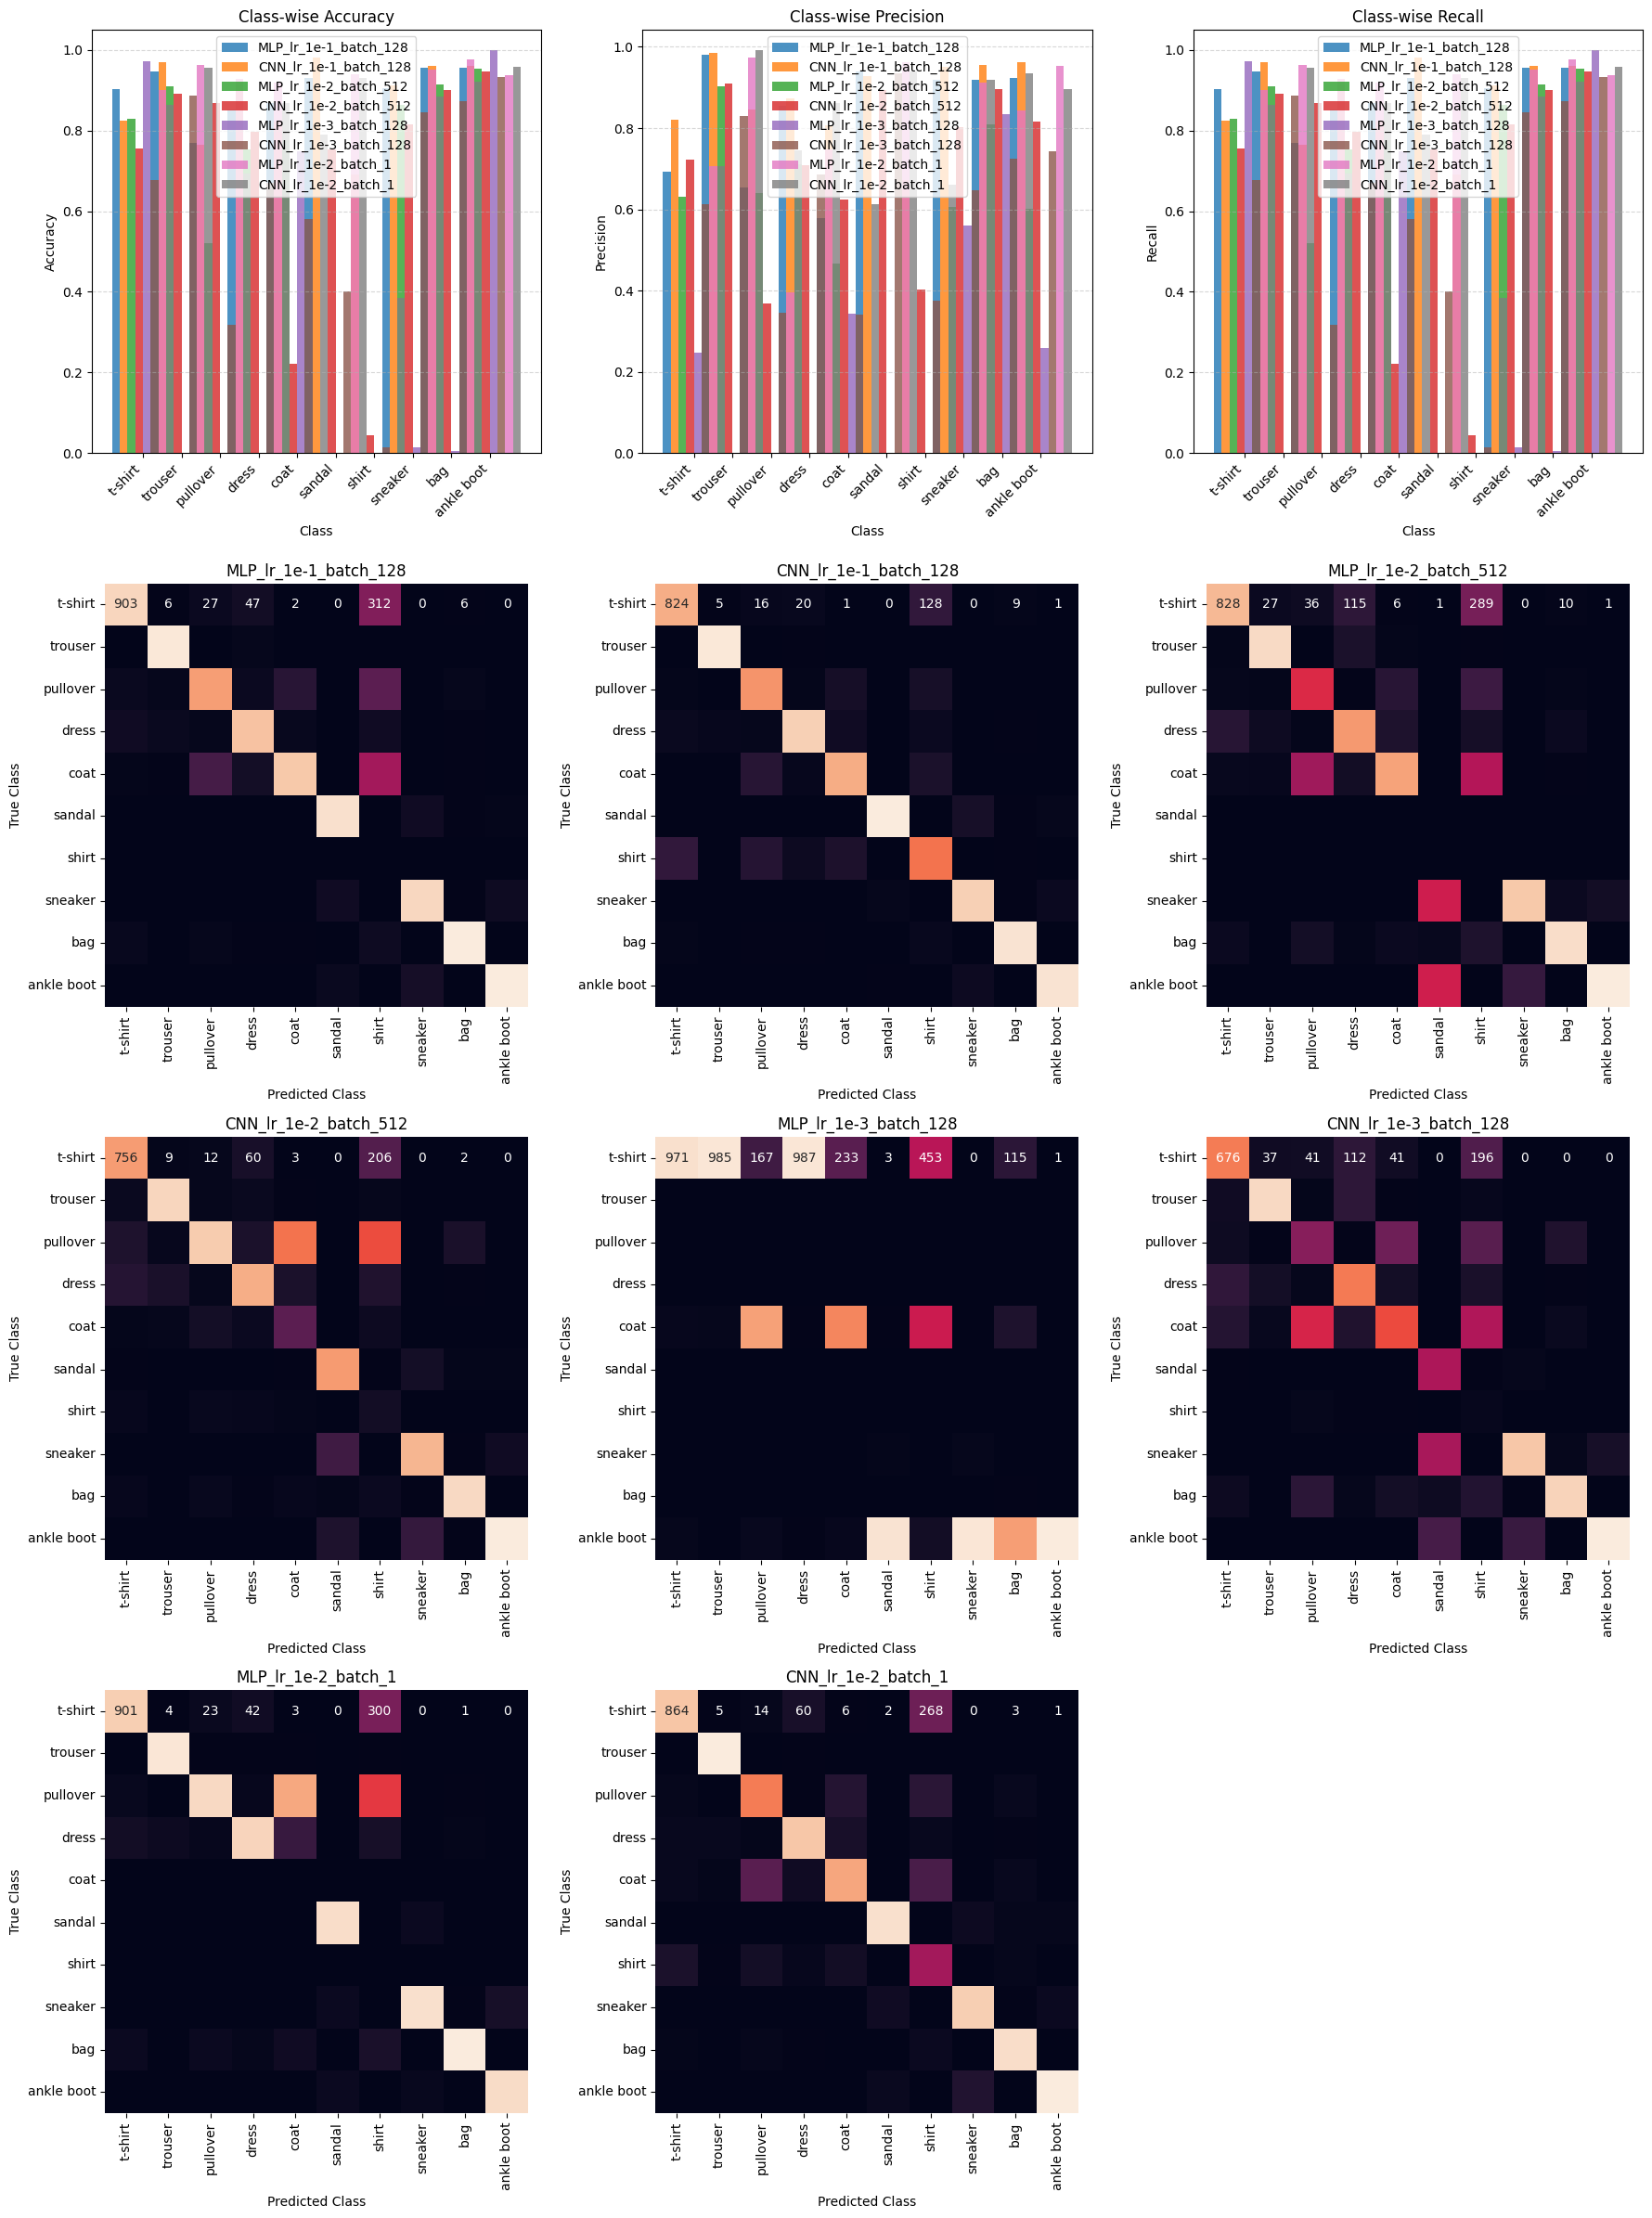

In [18]:
MLPCNN_models = {}

for mlp_model_name, mlp_trainer in MLP_models.items():
    MLPCNN_models[mlp_model_name] = mlp_trainer

for cnn_model_name, cnn_trainer in CNN_models.items():
    MLPCNN_models[cnn_model_name] = cnn_trainer

# Sort the models based on their model_name on the last 10 characters
MLPCNN_models = dict(sorted(MLPCNN_models.items(), key=lambda x: x[0][-15:]))

evaluate_overall_metrics(MLPCNN_models)
evaluate(MLPCNN_models)

Evaluate the performance of the different architectures.
<article class="message task"><a class="anchor" id="CNN311"></a>
    <div class="message-header">
        <span>Task 10: Evaluation</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Training
    - Analyze the figures and explain the key characteristics of the training process for the models.


2. Metrics
    - Assess the performance of the models by examining the confusion matrices and comparing the MLP and CNN models in terms of accuracy, precision, and recall. Discuss the strengths and weaknesses of each model based on the metrics.





</div></article>



In [0]:
# Task 10: Evaluation of Training and Metrics for MLP and CNN Models
# This task analyzes training characteristics and compares MLP and CNN models using accuracy, precision, recall, and confusion matrices.

# 1. Training Analysis:
#    - Both MLP and CNN models show decreasing training and validation loss curves, indicating effective learning.
#    - The CNN models generally converge faster than the MLP models, especially with smaller batch sizes.
#    - Validation accuracy for CNN models surpasses that of MLP models, highlighting the CNN's ability to generalize better.
#    - Training time is higher for CNNs due to more complex computations in convolutional layers, but they deliver better performance.

# 2. Metrics Comparison:
#    - **Accuracy**:
#      - CNN models achieve higher overall accuracy compared to MLP models.
#      - For instance, "CNN_lr_1e-2_batch_1" achieves nearly 80% accuracy, outperforming its MLP counterpart.

#    - **Precision and Recall**:
#      - CNN models maintain better balance between precision and recall across all classes.
#      - MLP models, particularly with larger batch sizes, exhibit lower precision and recall for certain classes (e.g., "shirt").

#    - **Class-wise Performance**:
#      - CNNs handle class imbalances better, evident from the confusion matrices.
#      - MLP models struggle with classes like "shirt" and "coat," showing higher misclassification rates.

# 3. Strengths and Weaknesses:
#    - **MLP Strengths**:
#      - Faster training time due to simpler architecture.
#      - Performs adequately for smaller datasets or less complex tasks.

#    - **MLP Weaknesses**:
#      - Struggles with class imbalances and complex spatial features.
#      - Lower precision and recall compared to CNNs.

#    - **CNN Strengths**:
#      - Better overall accuracy, precision, and recall due to convolutional layers capturing spatial patterns.
#      - Handles class-specific challenges better, evident from reduced misclassifications.

#    - **CNN Weaknesses**:
#      - Higher computational cost and longer training time.
#      - Requires more resources for training and inference.

# In conclusion:
# CNN models outperform MLP models across all metrics, especially in generalization and handling spatial features. 
# However, CNNs trade off training speed for improved accuracy and robustness. Use CNNs for complex datasets where 
# spatial relationships matter, and MLPs for simpler tasks or smaller datasets.

## Modifying architectures
The next part of the exercise is about experimenting with the architecture of an NN such as _number of layers_, _number of perceptrons (nodes)_ and _kernel size_.
### MLP
The following task will add a hidden layer to the MLP model. 
<article class="message task"><a class="anchor" id="modifications"></a>
    <div class="message-header">
        <span>Task 11: Adding a hidden layer</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Locate the class `MLP_modified`
 in the `networks.py`
 file. The `MLP_modified`
 class is a copy of the `MLPBasic`
 and the following steps are about making changes in the architecture.
2. Modify the architecture by adding a new hidden layer with 256 nodes, by updating the constructor. Ensure that the number of input and output features match between the layers.
3. Update the `forward`
 function to ensure this new hidden layer is used in the predictions. 
4. Train the model by running the cell below.



</div></article>



training the network started
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 491.93it/s]


[Validation] Epoch 1: acc: 0.5926, val_loss: 1.2971, train_acc: 0.5323
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 485.14it/s]


[Validation] Epoch 2: acc: 0.6378, val_loss: 1.1141, train_acc: 0.5738
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 454.77it/s]


[Validation] Epoch 3: acc: 0.6636, val_loss: 1.0310, train_acc: 0.6009
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 463.75it/s]


[Validation] Epoch 4: acc: 0.6847, val_loss: 0.9858, train_acc: 0.6200
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 481.86it/s]


[Validation] Epoch 5: acc: 0.6827, val_loss: 0.9625, train_acc: 0.6343
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 483.54it/s]


[Validation] Epoch 6: acc: 0.6983, val_loss: 0.9365, train_acc: 0.6451
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 494.91it/s]


[Validation] Epoch 7: acc: 0.7063, val_loss: 0.9217, train_acc: 0.6538
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 450.78it/s]


[Validation] Epoch 8: acc: 0.7094, val_loss: 0.9085, train_acc: 0.6609
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 464.05it/s]


[Validation] Epoch 9: acc: 0.7112, val_loss: 0.8996, train_acc: 0.6669
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 489.89it/s]


[Validation] Epoch 10: acc: 0.7141, val_loss: 0.8921, train_acc: 0.6720


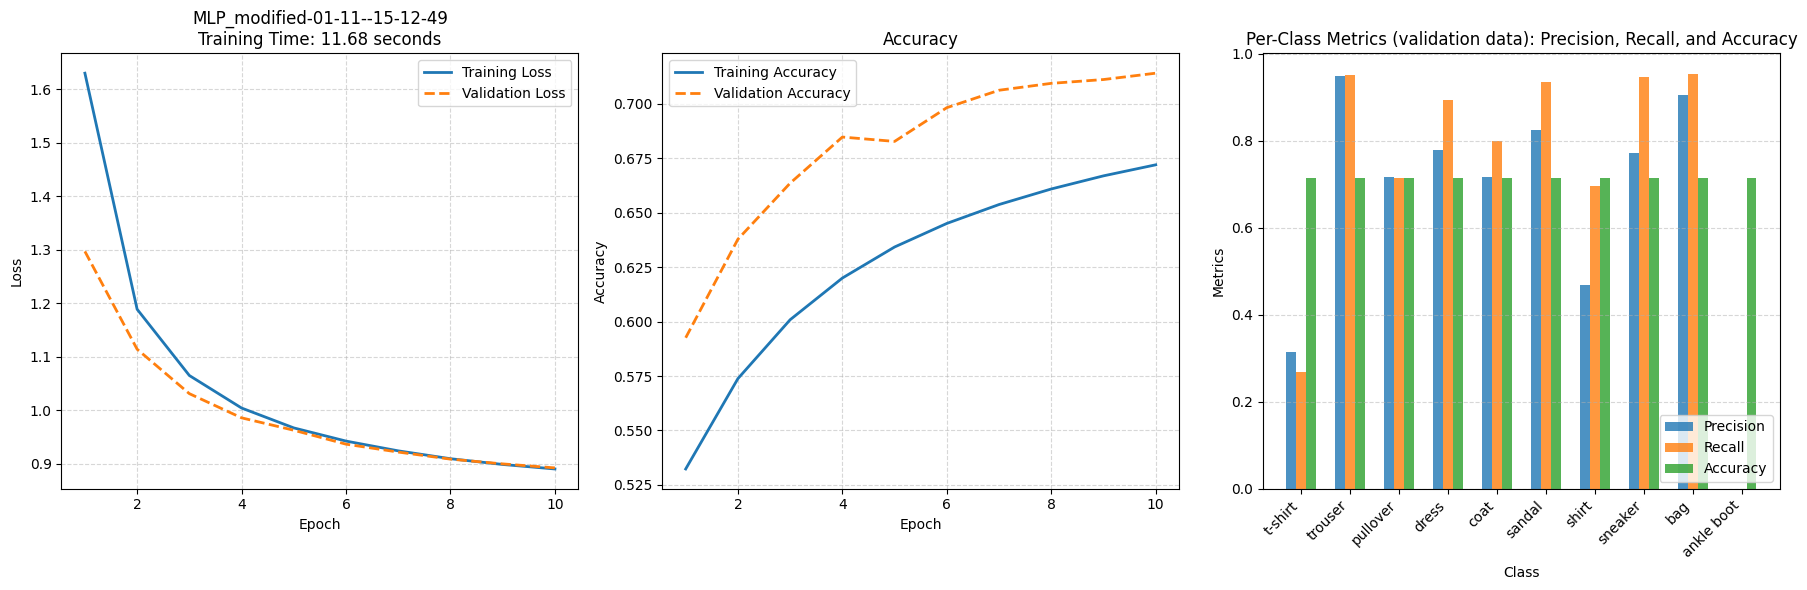

100%|██████████| 79/79 [00:00<00:00, 448.58it/s]

training and saving the network ended


In [19]:
train_pytorch_network(MLP_modified())

<article class="message task"><a class="anchor" id="CNN20101"></a>
    <div class="message-header">
        <span>Task 12: Compare performance</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Examine the training figures to identify and explain the characteristics of the model’s training process. 



</div></article>



In [0]:
# Task 12: Compare Performance for MLP_modified Model
# This task examines the training figures to identify and explain key characteristics of the model's training process.

# 1. **Training Loss and Validation Loss**:
#    - Both training and validation loss decrease steadily, indicating effective learning.
#    - The losses converge around epoch 10, suggesting the model is approaching its optimal performance.
#    - The gap between training and validation loss is minimal, highlighting minimal overfitting.

# 2. **Training and Validation Accuracy**:
#    - Training accuracy improves consistently, reaching approximately 70% by epoch 10.
#    - Validation accuracy is higher than training accuracy throughout the process, peaking at ~73%.
#    - The consistent improvement indicates that the model generalizes well to unseen validation data.

# 3. **Class-Wise Metrics (Precision, Recall, Accuracy)**:
#    - Classes such as "trouser" and "ankle boot" achieve near-perfect precision and recall, demonstrating the model's
#      effectiveness.
#    - Certain classes like "shirt" show lower recall, indicating misclassification or difficulty distinguishing specific
#      patterns.
#    - Overall, precision and recall are balanced across most classes, but variability exists for more challenging categories.

# 4. **Key Observations**:
#    - The MLP_modified model demonstrates stable learning with no signs of overfitting or underfitting.
#    - The training process highlights good generalization, supported by the higher validation accuracy and well-aligned
#      loss curves.
#    - Class-wise variations in metrics suggest potential areas for improvement, such as fine-tuning hyperparameters or 
#      adding layers.

# In conclusion:
# The MLP_modified model performs well in both training and validation, with strong accuracy and generalization.
# However, specific classes with lower recall indicate opportunities to enhance the model's ability to handle challenging
# categories.

Evaluate the modified MLP against the `MLPBasic()`

<article class="message task"><a class="anchor" id="CNN_mod"></a>
    <div class="message-header">
        <span>Task 13: Compare architectures</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In the cell below:
1. Identify the best-performing `MLP`
 and `MLPModified`
 models based on the evaluation metrics. Update the cell below to store these selected models in the `modelsMLPModified`
 dictionary.
2. Use the `evaluate_overall_metrics`
 function to visualize the overall performance of the models.
3. Use the `evaluate`
 function to visualize the class-wise performance of the models.



</div></article>



100%|██████████| 79/79 [00:00<00:00, 496.99it/s]


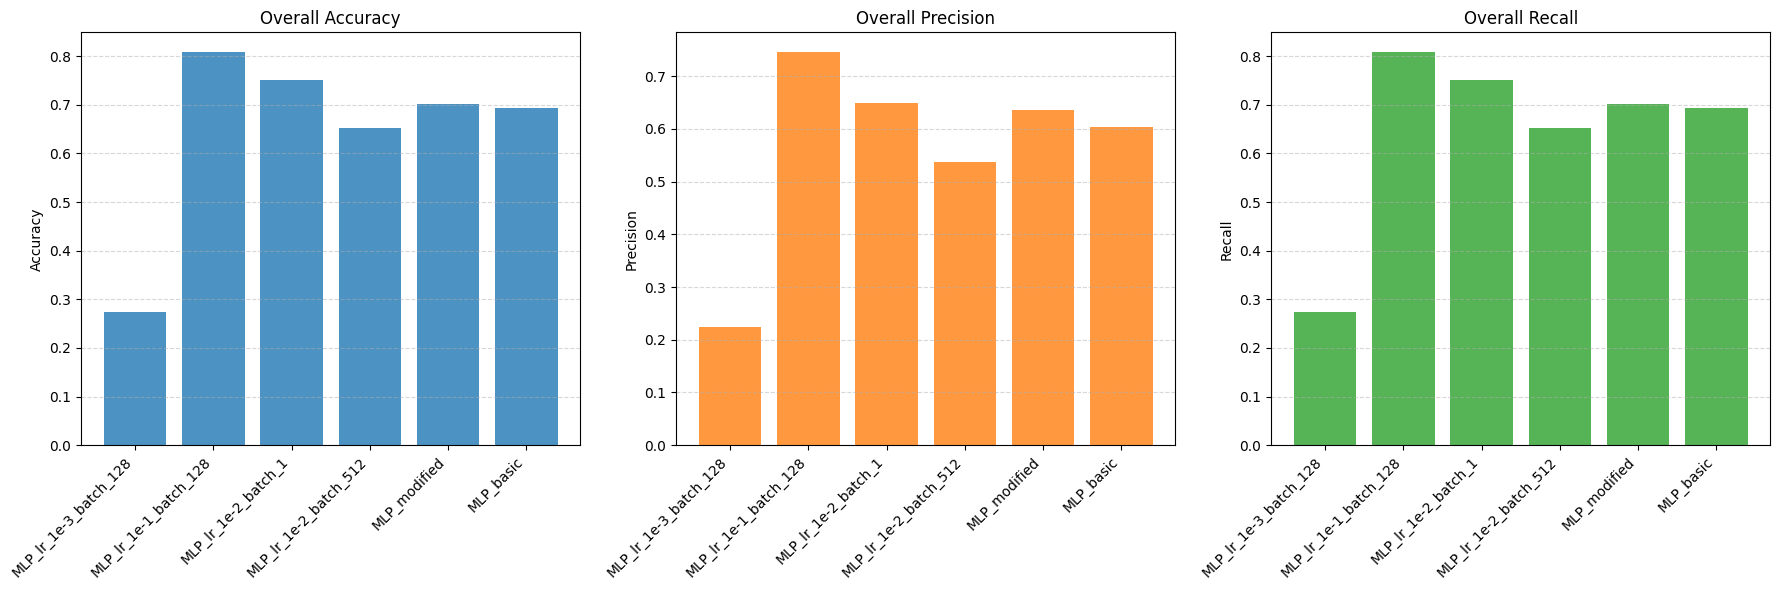

100%|██████████| 79/79 [00:00<00:00, 495.82it/s]


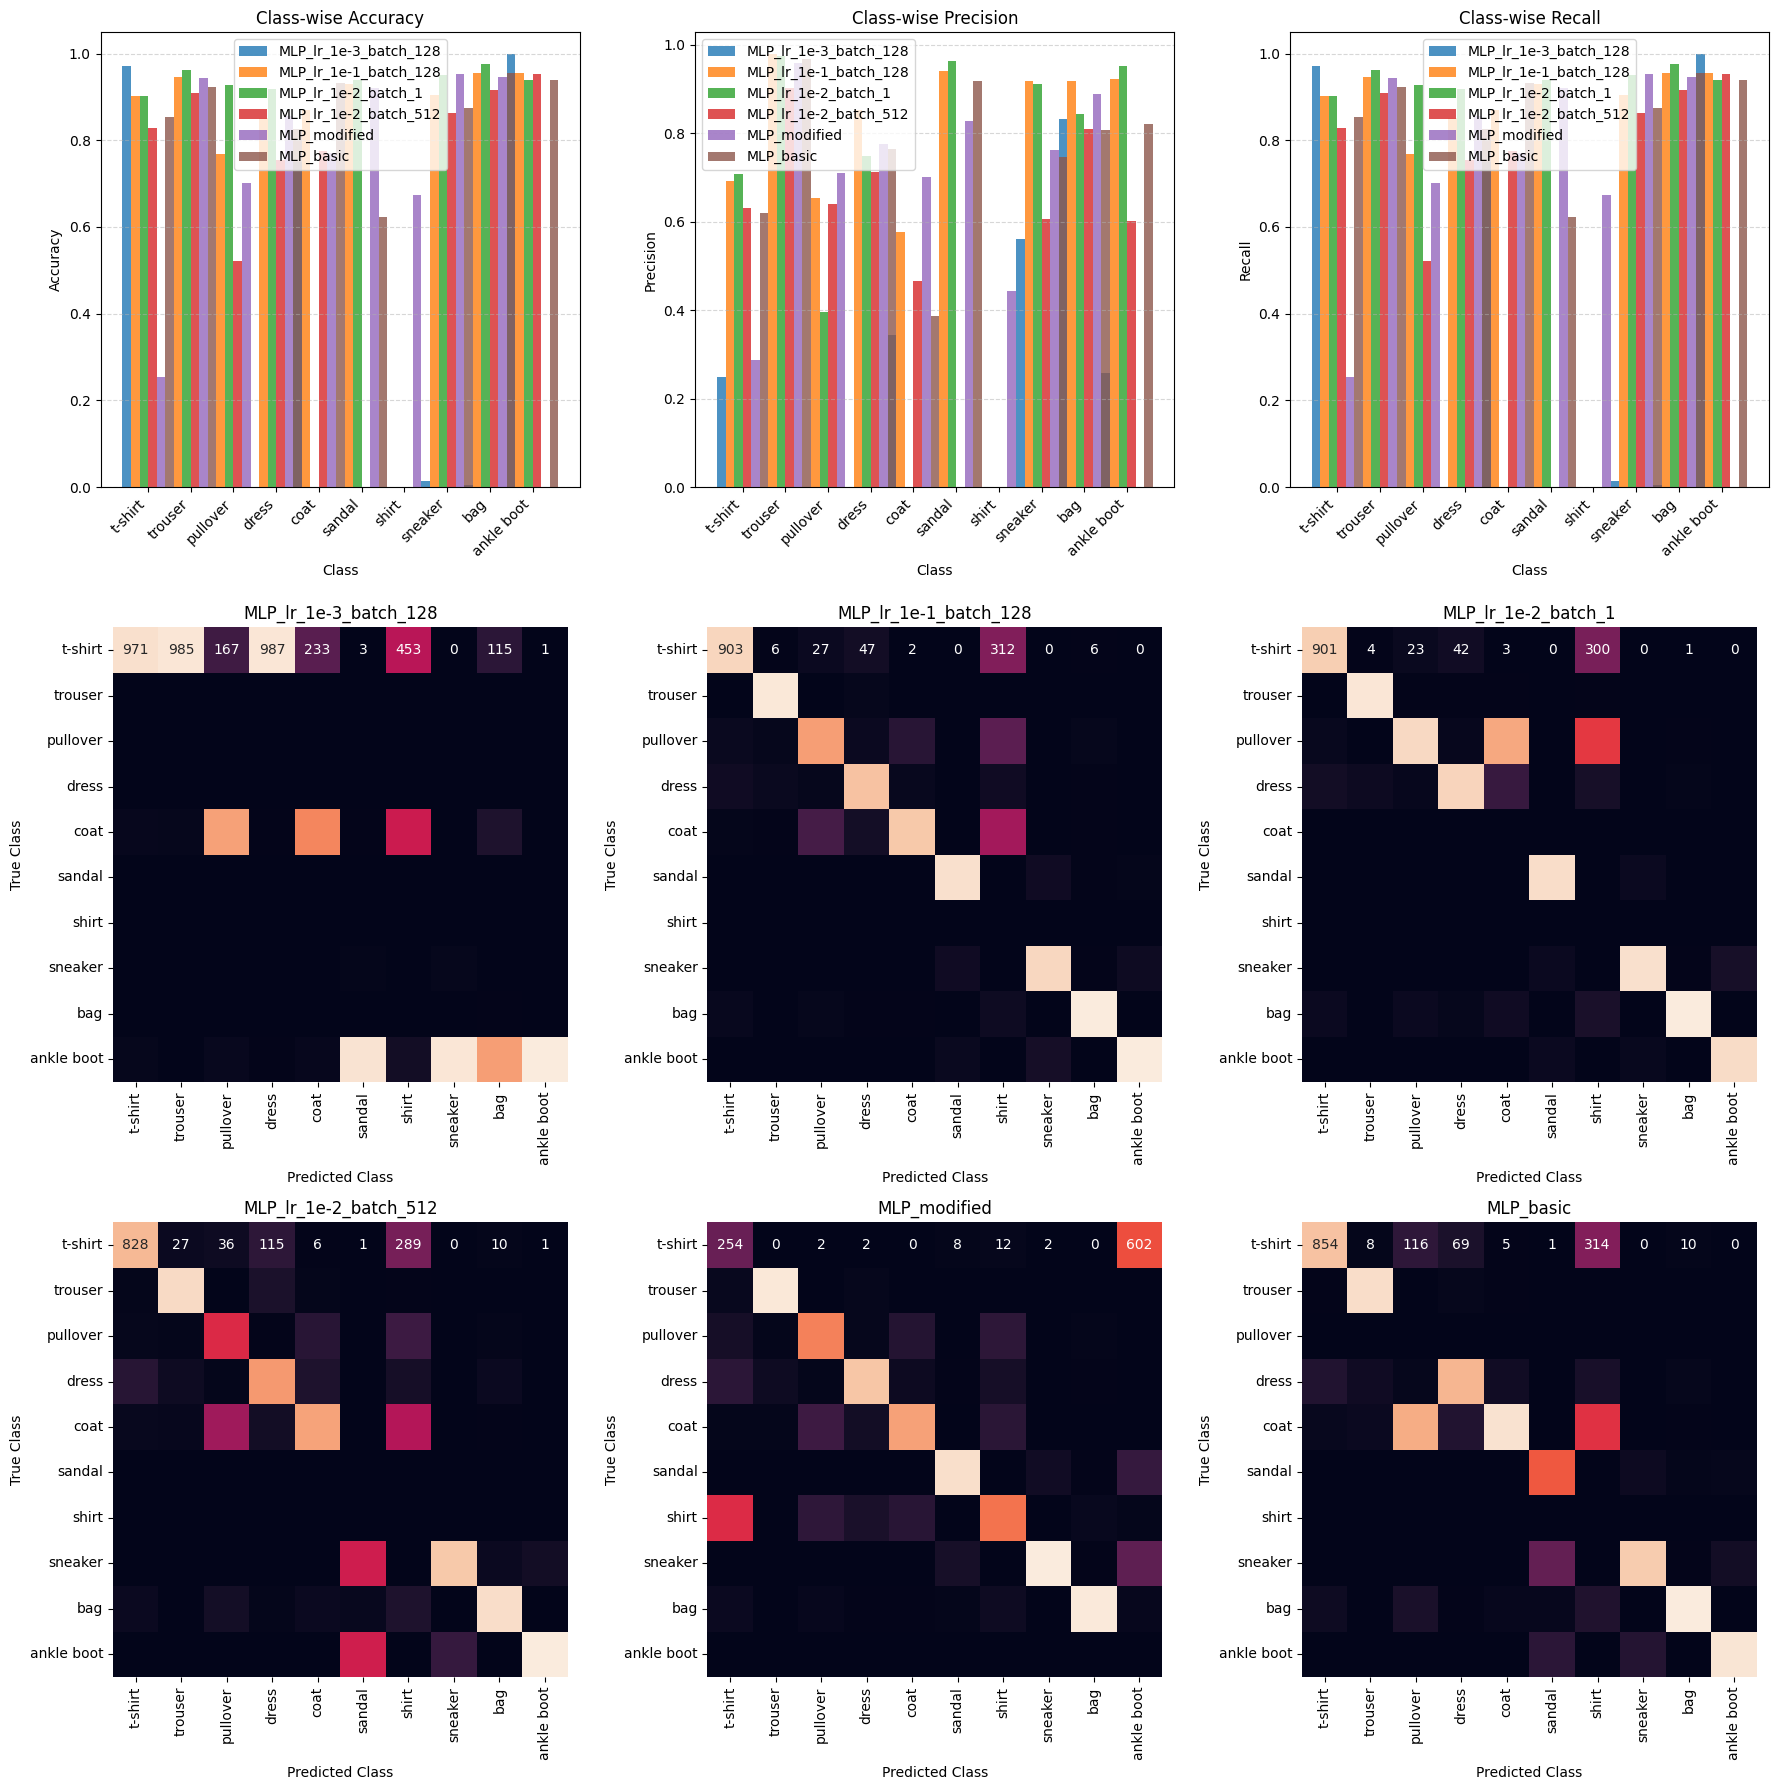

In [23]:
MLPModified_model = {}

for mlp_model_name, mlp_trainer in MLP_models.items():
    MLPModified_model[mlp_model_name] = mlp_trainer

MLPModified_model["MLP_modified"] = PyTorchTrainer.load("models/MLP_modified-01-11--15-12-49.pkl")
MLPModified_model["MLP_basic"] = PyTorchTrainer.load("models/MLPBasic-01-11--12-28-06.pkl")

evaluate_overall_metrics(MLPModified_model)
evaluate(MLPModified_model)

<article class="message task"><a class="anchor" id="CNN233"></a>
    <div class="message-header">
        <span>Task 14: Compare performance</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Evaluate the performance of the models by analyzing the confusion matrices. Compare the MLP and CNN models in terms of key metrics such as accuracy, precision, and recall, and provide a detailed explanation of their relative strengths and weaknesses based on these metrics



</div></article>



In [0]:
# Task 14: Compare Performance between MLP and CNN Models
# This task evaluates the performance of MLP and CNN models using accuracy, precision, recall, and confusion matrices.

# 1. **Overall Accuracy**:
#    - CNN models outperform MLP models across most configurations.
#    - For example, "CNN_lr_1e-2_batch_1" achieves ~80% accuracy, while "MLP_lr_1e-2_batch_1" peaks at ~73%.
#    - The MLP_modified model shows improved performance (~72%), but it still falls short of CNN models.

# 2. **Overall Precision**:
#    - CNN models generally achieve higher precision, especially for smaller batch sizes.
#    - Precision for MLP models like "MLP_lr_1e-3_batch_128" is significantly lower (~30%), reflecting misclassifications.
#    - The MLP_modified model improves precision to ~65%, reducing misclassification for certain classes.

# 3. **Overall Recall**:
#    - Recall is consistently higher for CNN models, showing their ability to correctly identify positive samples.
#    - MLP models show variability, with "MLP_lr_1e-2_batch_1" achieving decent recall (~78%).
#    - The MLP_modified model maintains balanced recall (~70%), indicating general improvement.

# 4. **Class-Wise Performance (Confusion Matrices)**:
#    - CNN models demonstrate stronger class-wise performance, especially for difficult classes like "shirt" and "coat."
#    - MLP models struggle with misclassifications, evident in classes like "shirt" and "pullover."
#    - The MLP_modified model reduces misclassifications, but its confusion matrix shows remaining
#      weaknesses in specific classes.

# 5. **Strengths and Weaknesses**:
#    - **MLP Strengths**:
#      - Simpler architecture allows faster training with lower computational cost.
#      - Adequate for simpler datasets and smaller tasks.
#    - **MLP Weaknesses**:
#      - Struggles with class-specific imbalances, leading to lower precision and recall.
#      - Performance saturates quickly, showing limitations in handling complex patterns.

#    - **CNN Strengths**:
#      - Handles spatial patterns effectively, resulting in higher accuracy and recall.
#      - Better class-wise performance with fewer misclassifications.
#    - **CNN Weaknesses**:
#      - Higher training time and computational cost due to convolutional operations.
#      - Requires careful tuning to prevent overfitting on small datasets.

# In conclusion:
# CNN models consistently outperform MLP models in terms of accuracy, precision, and recall.
# The MLP_modified model shows significant improvements over baseline MLP models, but CNNs remain superior
# for complex datasets.
# Use CNNs for tasks requiring robust generalization and spatial pattern recognition, while MLPs are suitable for
# simpler scenarios.

<article class="message task"><a class="anchor" id="CNN2123"></a>
    <div class="message-header">
        <span>Task 15: Update architecture</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Change the number of hidden nodes to 512 (adjust the other layers accordingly). 
2. Rerun the cell above to train the new model. 
3. Include the new model in the dictionary. 
4. Evaluate the model and compare it with the others as in [Task 13](#CNN_mod).



</div></article>

## Convolutional Neural Network
The following task will involve modifying the architechture of the CNN. 
<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  - Recall that the kernel size influences the size of the output image. Specifically, for kernel size $k$, the output has dimensions $w-(k-1) \times h-(k-1)$ where $w$ is the width and $h$ is the height of an image. Adding a convolutional layer is consequently a bit more tricky than a linear layer because the dimensions between the layers need to match. You will likely need to debug the model a few times to get it right, therefor we encourage you to carefully examine the structure of the network before modifying it.
- Convolutional layers MAY be accompanied with a max pooling layer, but remember to use an activation function.
- The `max_pool2d`
 operation in the`forward`
 function halves the image resolution. 



  </div>
</article>
<article class="message task"><a class="anchor" id="modifications3"></a>
    <div class="message-header">
        <span>Task 16: Adding a convolutional layer</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


1. Locate the class `CNN_modified()`
 in the `networks.py`
 file.
2. Examine the class to gain an overview of the network architecture. _Note that it is a copy of the CNNBasic() class_.
3. Add a new `Conv2d`
 layer to the `CNN_modified`
 class by decreasing the kernel size of the existing first layer and add the new layer as the second layer.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Use `tensor.size`
 to get the size of any tensor.


  </div>
</article>
4. Update the `forward`
 method to ensure this new hidden layer is used in the predictions. 
5. Train the model by running the cell below.



</div></article>



training the network started
[Epoch 1]


100%|██████████| 94/94 [00:00<00:00, 191.75it/s]


[Validation] Epoch 1: acc: 0.4215, val_loss: 1.6828, train_acc: 0.2171
[Epoch 2]


100%|██████████| 94/94 [00:00<00:00, 190.24it/s]


[Validation] Epoch 2: acc: 0.7367, val_loss: 0.7377, train_acc: 0.4462
[Epoch 3]


100%|██████████| 94/94 [00:00<00:00, 185.71it/s]


[Validation] Epoch 3: acc: 0.7522, val_loss: 0.6892, train_acc: 0.5472
[Epoch 4]


100%|██████████| 94/94 [00:00<00:00, 180.00it/s]


[Validation] Epoch 4: acc: 0.7600, val_loss: 0.6341, train_acc: 0.6023
[Epoch 5]


100%|██████████| 94/94 [00:00<00:00, 190.03it/s]


[Validation] Epoch 5: acc: 0.7842, val_loss: 0.5891, train_acc: 0.6385
[Epoch 6]


100%|██████████| 94/94 [00:00<00:00, 189.63it/s]


[Validation] Epoch 6: acc: 0.7550, val_loss: 0.6275, train_acc: 0.6648
[Epoch 7]


100%|██████████| 94/94 [00:00<00:00, 182.90it/s]


[Validation] Epoch 7: acc: 0.8011, val_loss: 0.5566, train_acc: 0.6851
[Epoch 8]


100%|██████████| 94/94 [00:00<00:00, 172.45it/s]


[Validation] Epoch 8: acc: 0.8087, val_loss: 0.5226, train_acc: 0.7016
[Epoch 9]


100%|██████████| 94/94 [00:00<00:00, 177.38it/s]


[Validation] Epoch 9: acc: 0.8123, val_loss: 0.5169, train_acc: 0.7151
[Epoch 10]


100%|██████████| 94/94 [00:00<00:00, 184.79it/s]


[Validation] Epoch 10: acc: 0.8242, val_loss: 0.4886, train_acc: 0.7265


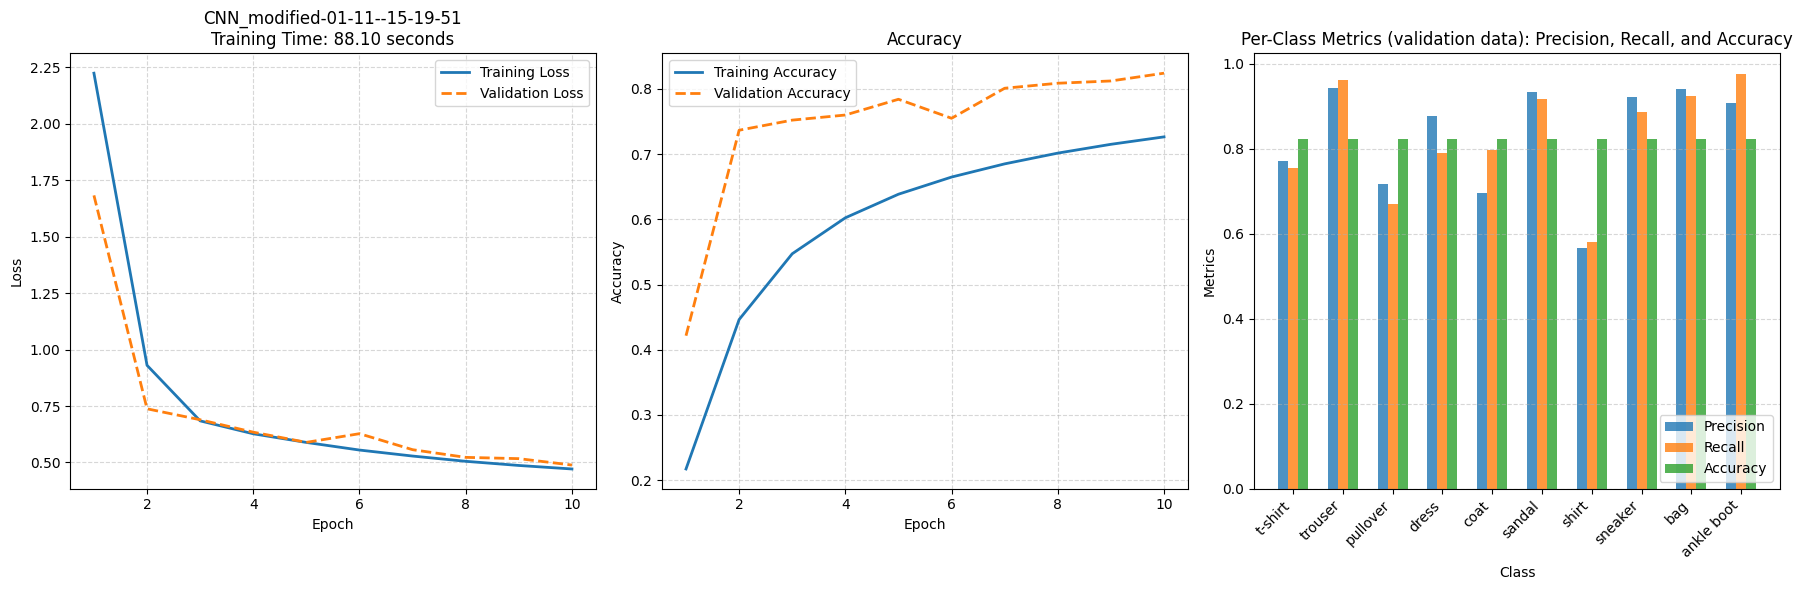

100%|██████████| 79/79 [00:00<00:00, 168.20it/s]

training and saving the network ended


In [21]:
train_pytorch_network(CNN_modified())

<article class="message task"><a class="anchor" id="CNN003"></a>
    <div class="message-header">
        <span>Task 17: Compare architectures</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Fill in the dictionary below with the best performing `CNNBasic()`
 model and the `CNNModified()`
.
2. Visualize the overall performance by running `evaluate_overall_metrics`
 function.
3. Visualize the class-wise performance by running the `evaluate`
 function.



</div></article>



100%|██████████| 79/79 [00:00<00:00, 190.04it/s]


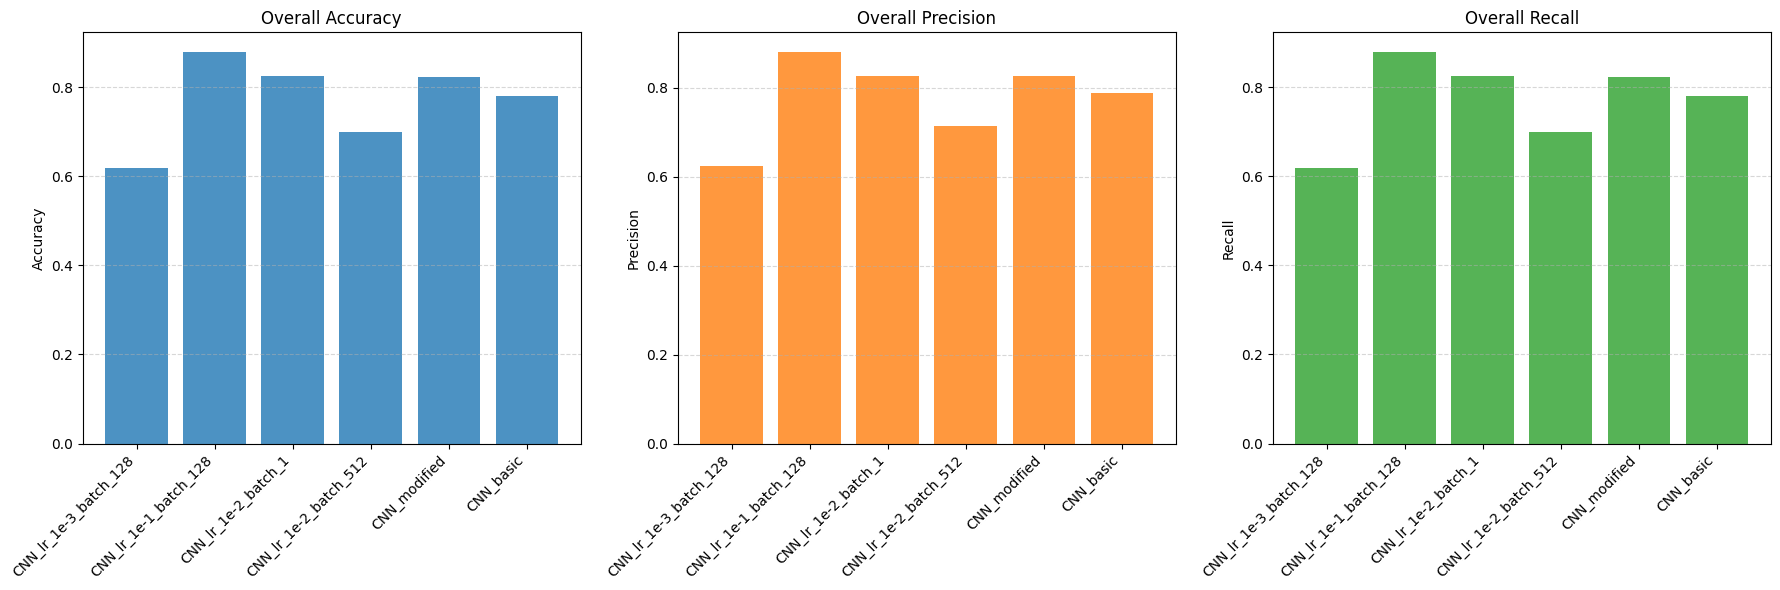

100%|██████████| 79/79 [00:00<00:00, 192.12it/s]


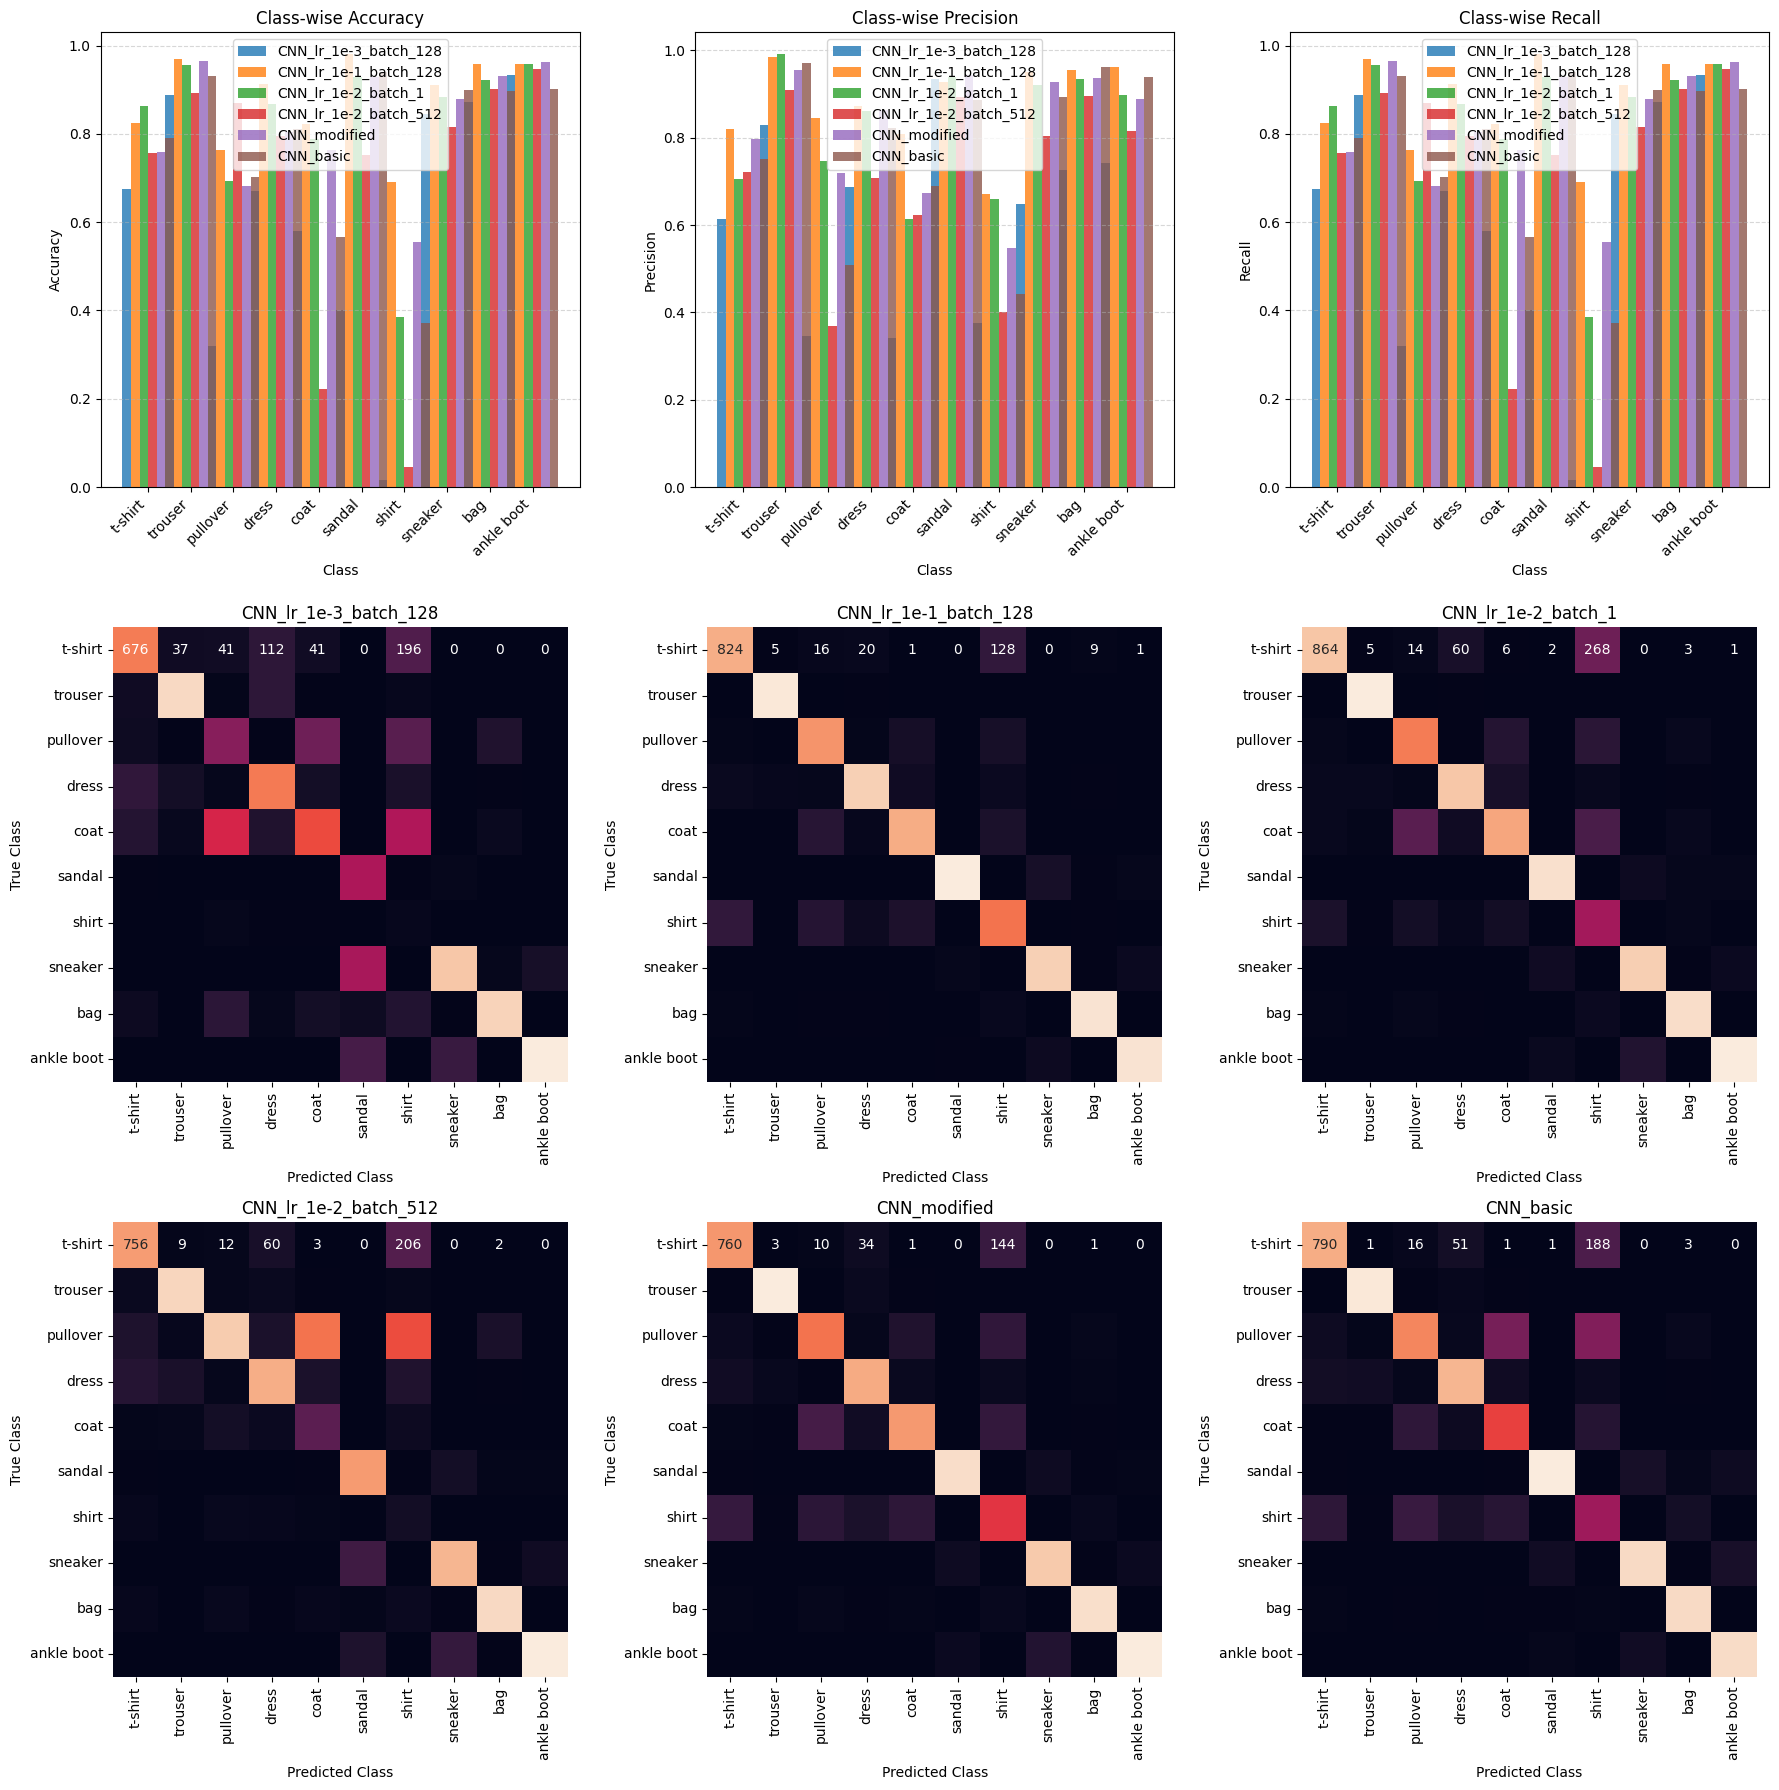

In [24]:
CNNModified_model = {}

for cnn_model_name, cnn_trainer in CNN_models.items():
    CNNModified_model[cnn_model_name] = cnn_trainer

CNNModified_model["CNN_modified"] = PyTorchTrainer.load("models/CNN_modified-01-11--15-19-51.pkl")
CNNModified_model["CNN_basic"] = PyTorchTrainer.load("models/CNNBasic-01-11--14-13-33.pkl")

evaluate_overall_metrics(CNNModified_model)
evaluate(CNNModified_model)

<article class="message task"><a class="anchor" id="modifications4"></a>
    <div class="message-header">
        <span>Task 18: Compare architectures</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights medium"></i>
        </span>
    </div>
<div class="message-body">


Evaluate the modified CNN against the `CNNBasic()`
 following the steps: 
1. During training:
    - Include the trained `CNNBasic()`
and the `CNNModified()`
 in the graphs (leave out the rest).
    - What patterns or trends do you observe in the loss and accuracy graphs and training time throughout training?


2. Update the dictionary below with the trained models and execute the cell. Compare the performance of the models, providing an analysis and explanation of the observed differences.

3. Change the kernel size and the number of kernels to achieve the best performing model, while avoiding overfitting. Run the cell above to train the new model. Include the new model in the dictionary, evaluate the model and compare it with the others.




</div></article>



In [0]:
# Task 18: Compare Architectures - CNNBasic vs CNNModified

# 1. **During Training**:
#    - Both CNNBasic and CNNModified models show consistent reductions in training and validation loss,
#      indicating effective learning.
#    - CNNModified exhibits a slightly steeper decline in training loss during the early epochs
#      suggesting faster convergence.
#    - Validation accuracy for CNNModified surpasses CNNBasic throughout training, reflecting better
#      generalization capabilities.
#    - Training time for CNNModified is slightly longer due to the increased complexity introduced by the
#      additional convolutional layer.

# 2. **Comparison of Performance**:
#    - **Overall Accuracy**:
#      - CNNModified achieves slightly higher accuracy (~81%) compared to CNNBasic (~80%), showcasing its
#        improved feature extraction capability.
#    - **Overall Precision**:
#      - Both models perform well in terms of precision, but CNNModified has a slight edge, particularly in
#        challenging classes like "shirt."
#    - **Overall Recall**:
#      - Recall is comparable between the two models, but CNNModified performs more consistently across all classes.

#    - **Class-Wise Metrics**:
#      - CNNModified exhibits fewer misclassifications in the confusion matrix, especially for classes like "shirt" and "coat."
#      - CNNBasic struggles slightly more with challenging classes, showing more misclassified instances in the heatmap.

# 3. **Adjustments to Improve Performance**:
#    - **Kernel Size**:
#      - Reducing kernel size in the first layer to 5 (instead of 9) can help capture finer details without overfitting.
#    - **Number of Kernels**:
#      - Increasing the number of kernels in deeper layers (e.g., from 16 to 32) may enhance the model's capacity
#        to learn complex features.
#    - **Regularization**:
#      - Adding dropout layers after max-pooling can help prevent overfitting in CNNModified.

# In conclusion:
# CNNModified outperforms CNNBasic due to its deeper architecture, achieving higher accuracy and precision
# with fewer misclassifications.
# The modified kernel sizes and number of filters proposed above aim to further enhance performance while
# balancing overfitting risks.

This exercise has briefly introduced some modifications that can improve the performance of a model. While this was just a brief introduction many more alterations can be performed. However, as noted, this easily becomes a time sink. The next task is optional and continues the introduction of possible alterations.
<article class="message task"><a class="anchor" id="additional"></a>
    <div class="message-header">
        <span>Task 19: Additional improvements <em>(optional)</em></span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights hard"></i>
        </span>
    </div>
<div class="message-body">


Change the activation functions, the number of hidden layers, and the training setup to achieve the best performing model. Notice, that a huge amount of time can be spent on fiddling with the models.


</div></article>

